In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Malgun Gothic")


In [1]:
a=input('입력하시오: ')

## EDA 분석
- 호텔 등급이 높을수록 평균 평점이 높다
- 평점이나 숙박기간, 호텔등급, 이용인원과 후기 글자수는 크게 연관이 없다.
- 제주도는 1월과 8월에 이용객이 많은 것다. 방학기간에 커플과 가족여행인원이 증가하는 것으로 추정

- 커플이나 가족은 주로 5성급 이용
- 나홀로 여행객 및 출장 여행객은 3성급 이용
- 월별로 호텔 선호순위가 다르다. 여행지 차이로 추정(추후 위도, 경도 확보하여 추가조사?)

In [2]:
df = pd.read_csv('./hotel.csv')
df.head(5)

Grade                         Hotel Country  Year  Month  stay_day  \
0      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      5         3   
1      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2019      8         1   
2      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      4         1   
3      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      3         1   
4      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      2         2   

            member Room type           Date          Review Title  \
0          나홀로 여행객   스탠다드 트윈  2021년 5월 | 3박             기대보다 좋았어요   
1        커플/2인 여행객    객실정보없음  2019년 8월 | 1박                 수영장이용   
2        커플/2인 여행객   프리미엄 더블  2021년 4월 | 1박        메종 글래드 너무 좋았어요   
3  유아/아동 동반 가족 여행객   스탠다드 트윈  2021년 3월 | 1박  성급 호텔을 저렴한가격에 누릴수있는곳   
4        커플/2인 여행객   스탠다드 트윈  2021년 2월 | 2박          계절이 다른 도심속호텔   

                                     Review Contents  Point  
0  시설이 낡았다는 후기를 보고 별 기대없이 갔는데 박동안 행복하게 보내고 왔습니다 새...   10.0  
1  첫날 공항이랑 가까워서 이용했구요 수영장이 화면보다 작아요 많이 수영장보고 선택한건...   10.0  
2  메종 글래드는 처음이였는데 제주 여행 마지막날 다른 숙소에서 벌레를 보고나서 바로 ...   10.0  
3  로비 직원분들 친절하시고 레스토랑과 카페 분위기가 너무 좋았습니다 특히 가격도 호텔...   10.0  
4  제주를 매달 한번씩은 가고있는데 메종은 거의 계절마다 방문하는거 같습니다 항상 친절...   10.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30584 entries, 0 to 30583
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Grade            30584 non-null  int64  
 1   Hotel            30584 non-null  object 
 2   Country          30584 non-null  object 
 3   Year             30584 non-null  int64  
 4   Month            30584 non-null  int64  
 5   stay_day         30584 non-null  int64  
 6   member           30584 non-null  object 
 7   Room type        30584 non-null  object 
 8   Date             30584 non-null  object 
 9   Review Title     30225 non-null  object 
 10  Review Contents  30335 non-null  object 
 11  Point            30584 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.8+ MB


In [4]:
df['Review Contents_len'] = df['Review Contents'].str.len()
df.head()

Grade                         Hotel Country  Year  Month  stay_day  \
0      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      5         3   
1      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2019      8         1   
2      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      4         1   
3      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      3         1   
4      5  메종 글래드 제주 (Maison Glad Jeju)    대한민국  2021      2         2   

            member Room type           Date          Review Title  \
0          나홀로 여행객   스탠다드 트윈  2021년 5월 | 3박             기대보다 좋았어요   
1        커플/2인 여행객    객실정보없음  2019년 8월 | 1박                 수영장이용   
2        커플/2인 여행객   프리미엄 더블  2021년 4월 | 1박        메종 글래드 너무 좋았어요   
3  유아/아동 동반 가족 여행객   스탠다드 트윈  2021년 3월 | 1박  성급 호텔을 저렴한가격에 누릴수있는곳   
4        커플/2인 여행객   스탠다드 트윈  2021년 2월 | 2박          계절이 다른 도심속호텔   

                                     Review Contents  Point  \
0  시설이 낡았다는 후기를 보고 별 기대없이 갔는데 박동안 행복하게 보내고 왔습니다 새...   10.0   
1  첫날 공항이랑 가까워서 이용했구요 수영장이 화면보다 작아요 많이 수영장보고 선택한건...   10.0   
2  메종 글래드는 처음이였는데 제주 여행 마지막날 다른 숙소에서 벌레를 보고나서 바로 ...   10.0   
3  로비 직원분들 친절하시고 레스토랑과 카페 분위기가 너무 좋았습니다 특히 가격도 호텔...   10.0   
4  제주를 매달 한번씩은 가고있는데 메종은 거의 계절마다 방문하는거 같습니다 항상 친절...   10.0   

   Review Contents_len  
0                280.0  
1                227.0  
2                388.0  
3                209.0  
4                199.0

In [5]:
df_group=df.groupby('Hotel')['Point'].count()
print(df_group)

Hotel
CJ 관광호텔 (CJ Tourist Hotel)                                   13
갤럭시 호텔 (Galaxy Hotel)                                        39
골드원 호텔 앤 스위트 (GoldOne Hotel & Suites)                       405
골든 파크 호텔 제주 (Golden Park Hotel Jeju)                         60
그라벨 호텔 (Grabel Hotel)                                      1331
그랜드 조선 제주 (Grand Josun Jeju)                                608
그랜드 하얏트 제주 (Grand Hyatt Jeju)                               840
까사로마 호텔 (Casaloma hotel)                                    496
다인 오세아노 호텔 (Dyne Oceano Hotel)                              958
더 스테이 센츄리 호텔 (The Stay Century Hotel)                        40
라마다 프라자 제주 호텔 (Ramada Plaza Jeju)                           961
라온 호텔 앤 리조트 (Jeju Raon Hotel & Resort)                      517
랜딩관 제주신화월드 호텔 앤 리조트 (Jeju Shinhwa World Landing Resort)    1090
롯데 호텔 제주 (Lotte Hotel Jeju)                                 951
리시온 호텔 (Rezion Hotel)                                       116
메종 글래드 제주 (Maison Glad Jeju)      

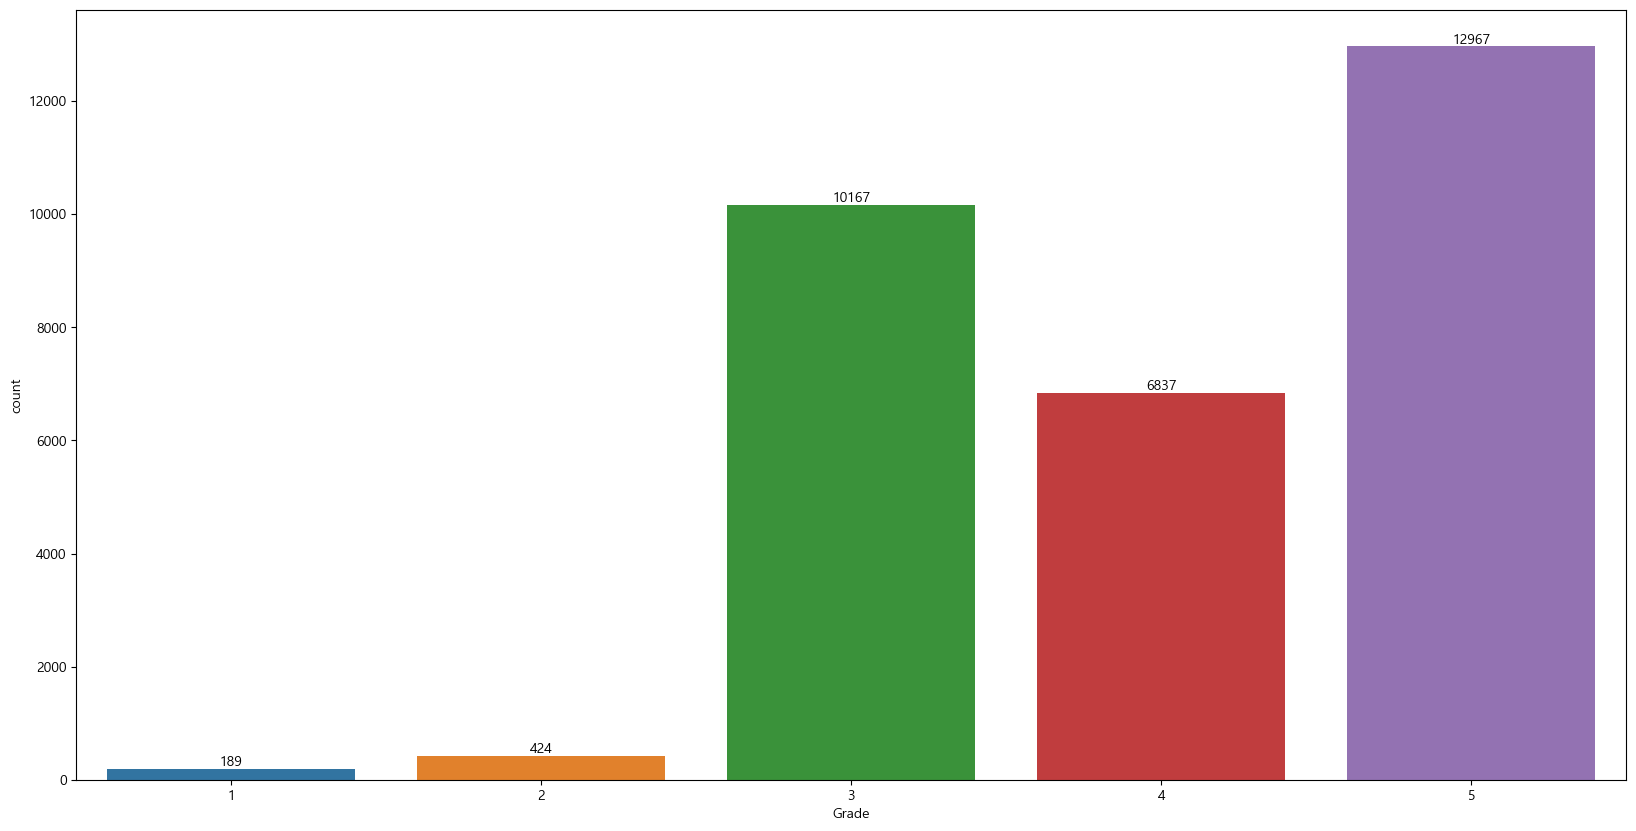

In [6]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df,x='Grade')
ax.bar_label(ax.containers[0])
plt.show()

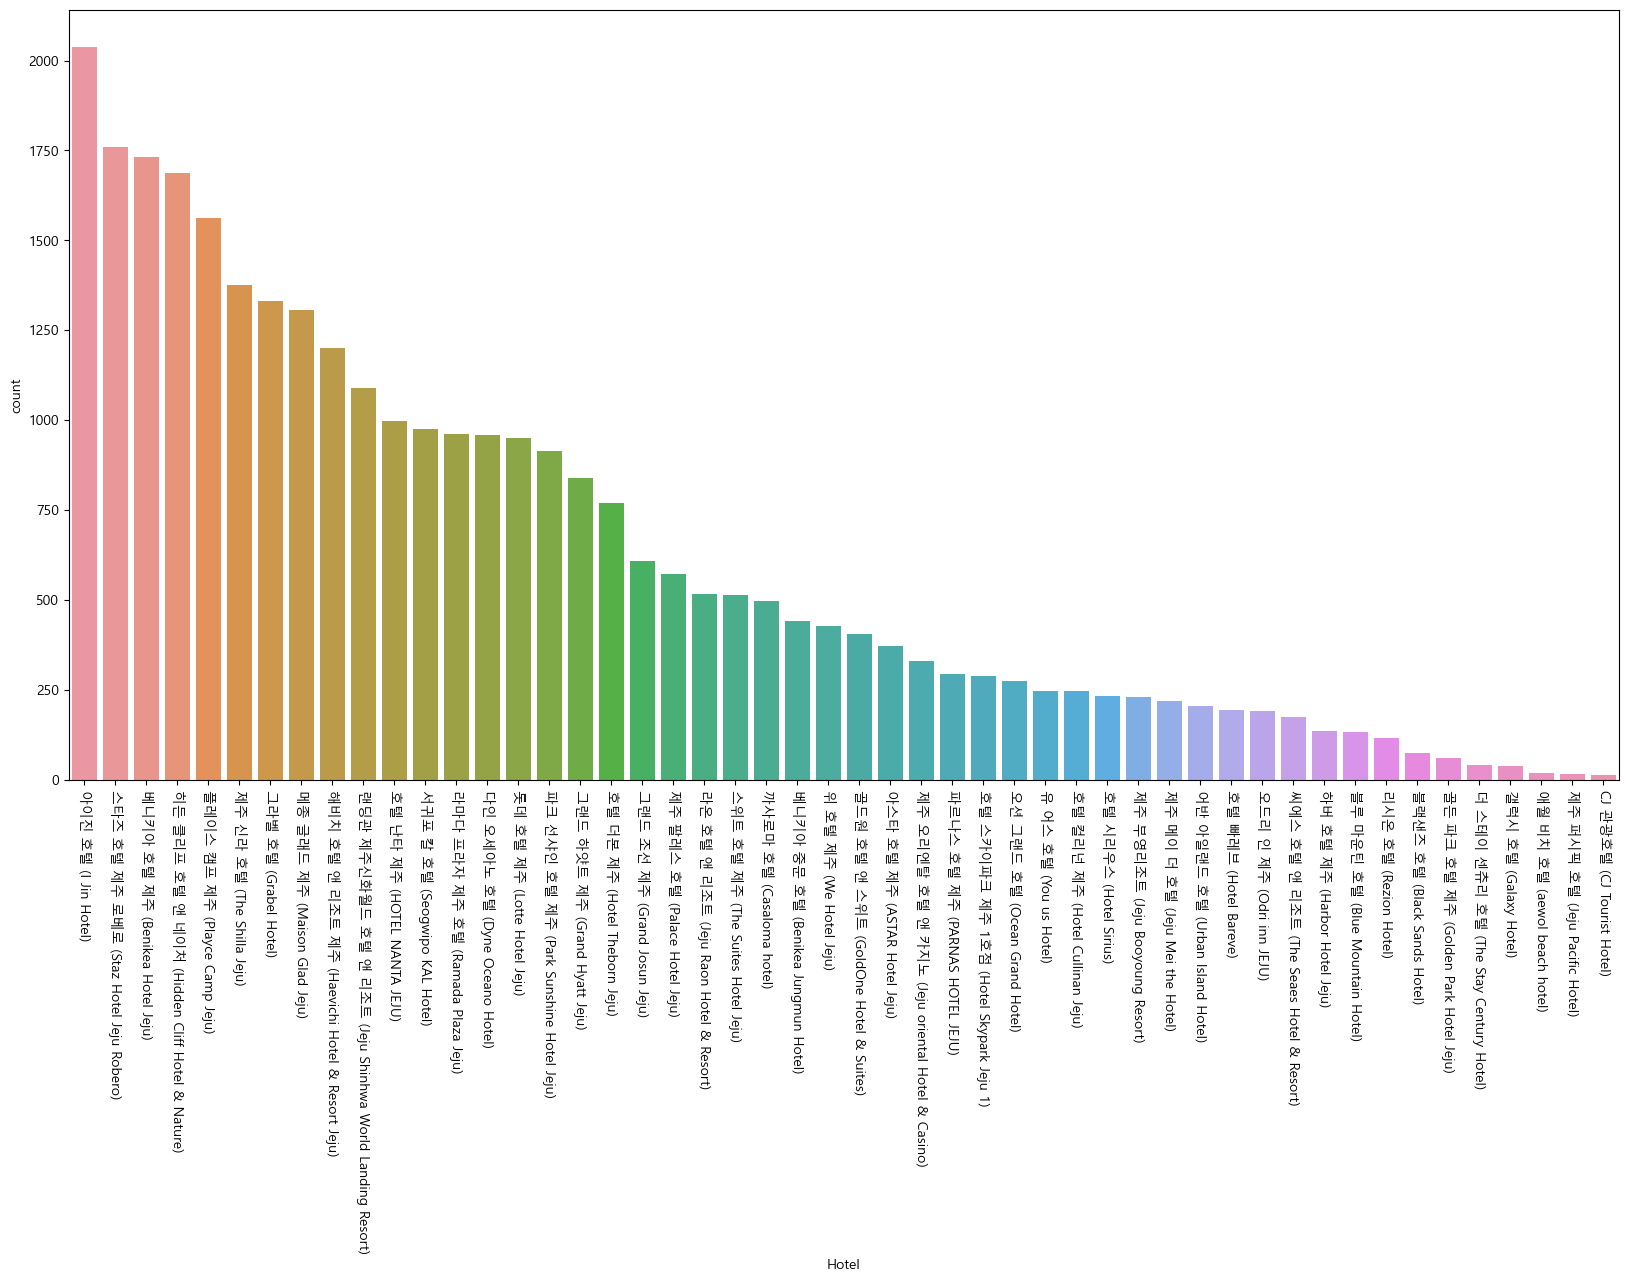

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(df,x='Hotel',order=df['Hotel'].value_counts().index)
plt.xticks(rotation=-90)
plt.show()

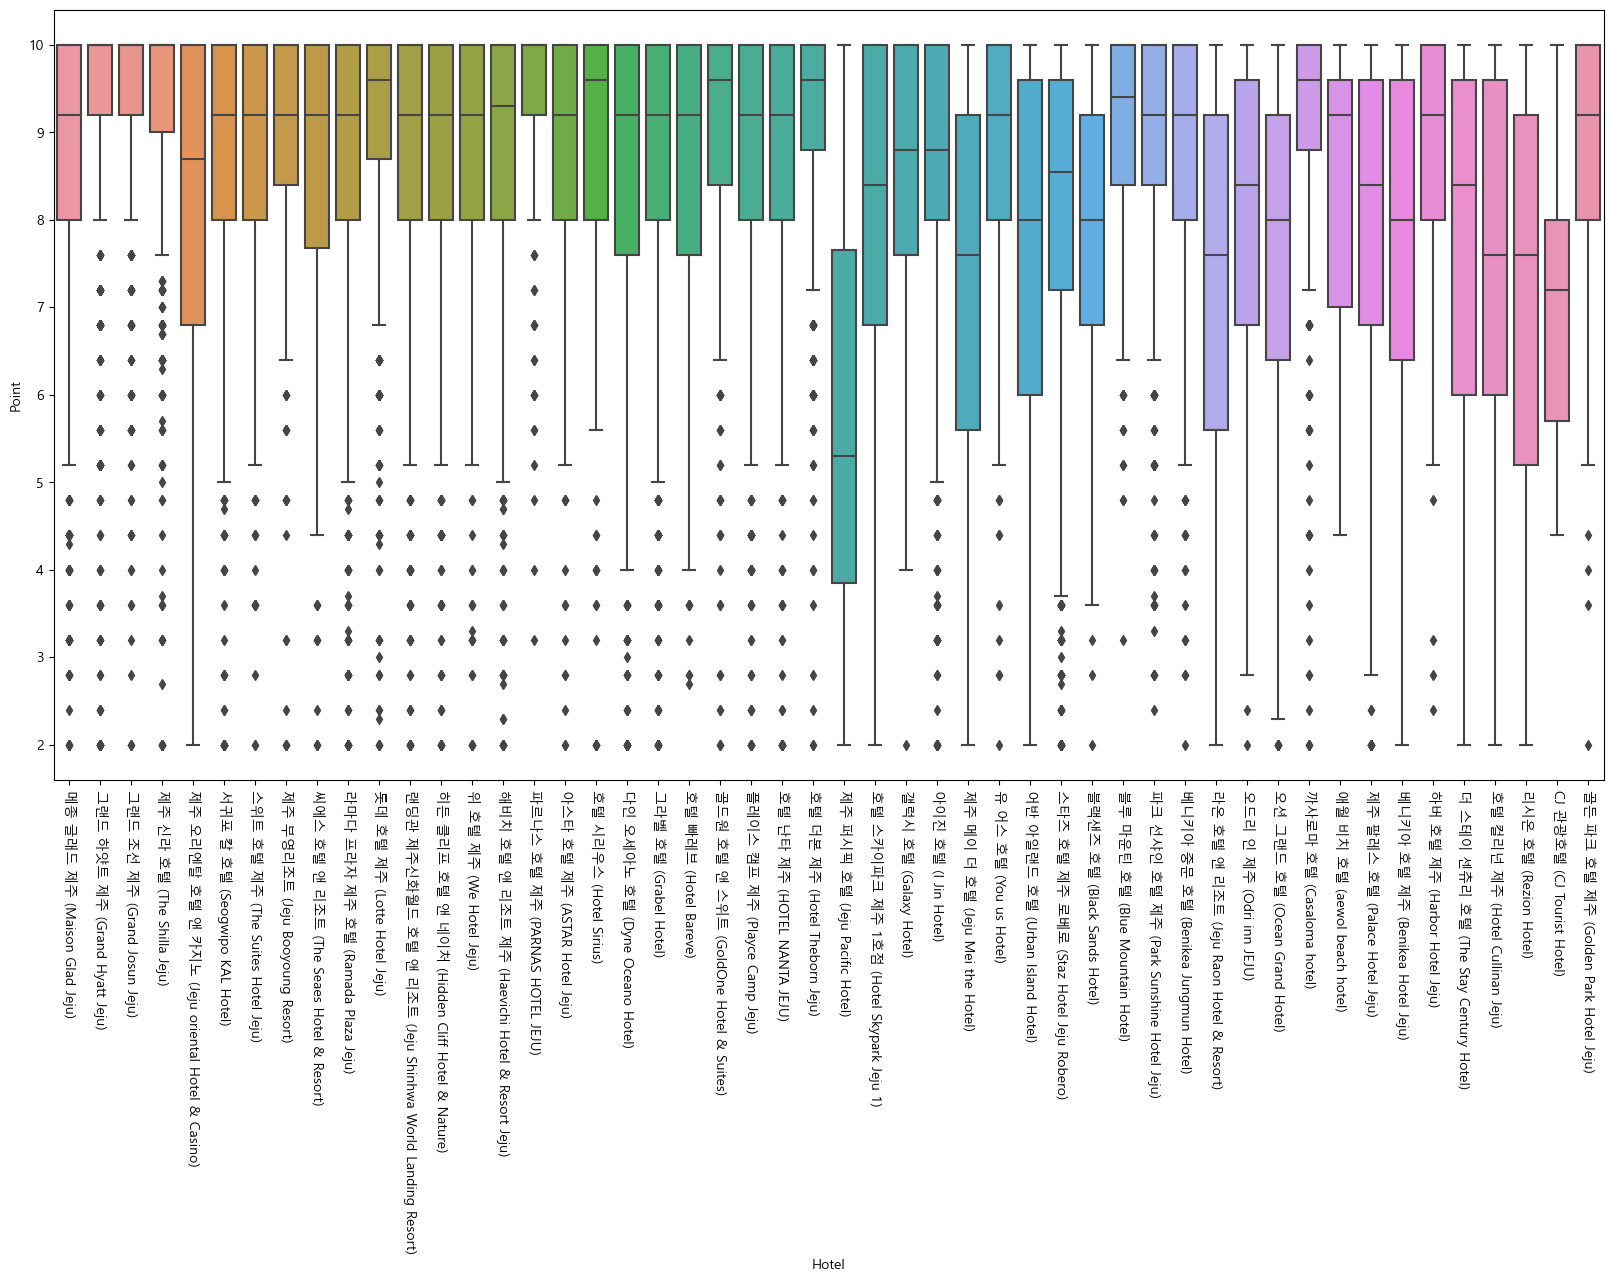

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(df,x='Hotel',y='Point')
plt.xticks(rotation=-90)
plt.show()

In [9]:
#호텔등급과 평점 관계
df_pivot1 = pd.pivot_table(df, index=['Grade'],values='Point',aggfunc=[np.mean,max,min,len])
df_pivot1

mean   max   min    len
          Point Point Point  Point
Grade                             
1      7.471958  10.0   2.0    189
2      7.862736  10.0   2.0    424
3      8.197335  10.0   2.0  10167
4      8.682609  10.0   2.0   6837
5      8.792334  10.0   2.0  12967

<AxesSubplot: xlabel='Grade', ylabel='Point'>

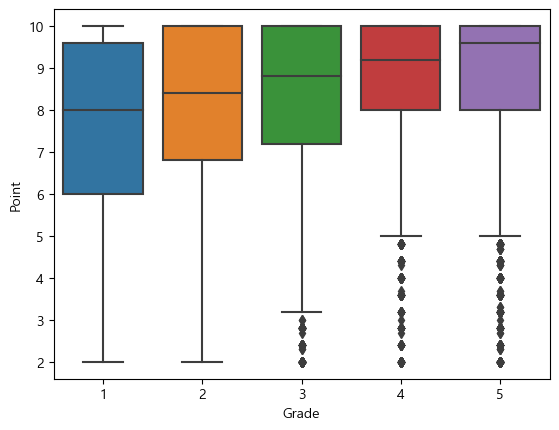

In [10]:
sns.boxplot(df,x='Grade',y='Point')

In [11]:
#호텔 등급별 리뷰 글자 수
df_pivot12 =pd.pivot_table(df, index='Grade',values='Review Contents_len', aggfunc=[np.mean,max,min,len])
df_pivot12

mean                 max                 min  \
      Review Contents_len Review Contents_len Review Contents_len   
Grade                                                               
1               68.303191               321.0                 2.0   
2               69.451306               424.0                 1.0   
3               78.312264              1207.0                 1.0   
4               89.079412              1552.0                 1.0   
5               80.474393              1343.0                 1.0   

                      len  
      Review Contents_len  
Grade                      
1                     189  
2                     424  
3                   10167  
4                    6837  
5                   12967

<AxesSubplot: xlabel='Grade', ylabel='Review Contents_len'>

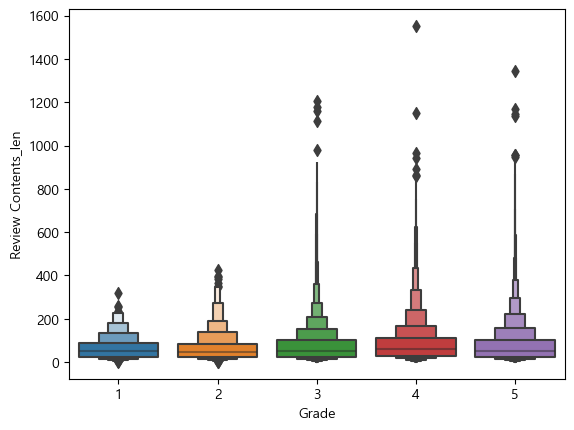

In [12]:
sns.boxenplot(df,x='Grade',y='Review Contents_len')

<AxesSubplot: xlabel='Point', ylabel='Review Contents_len'>

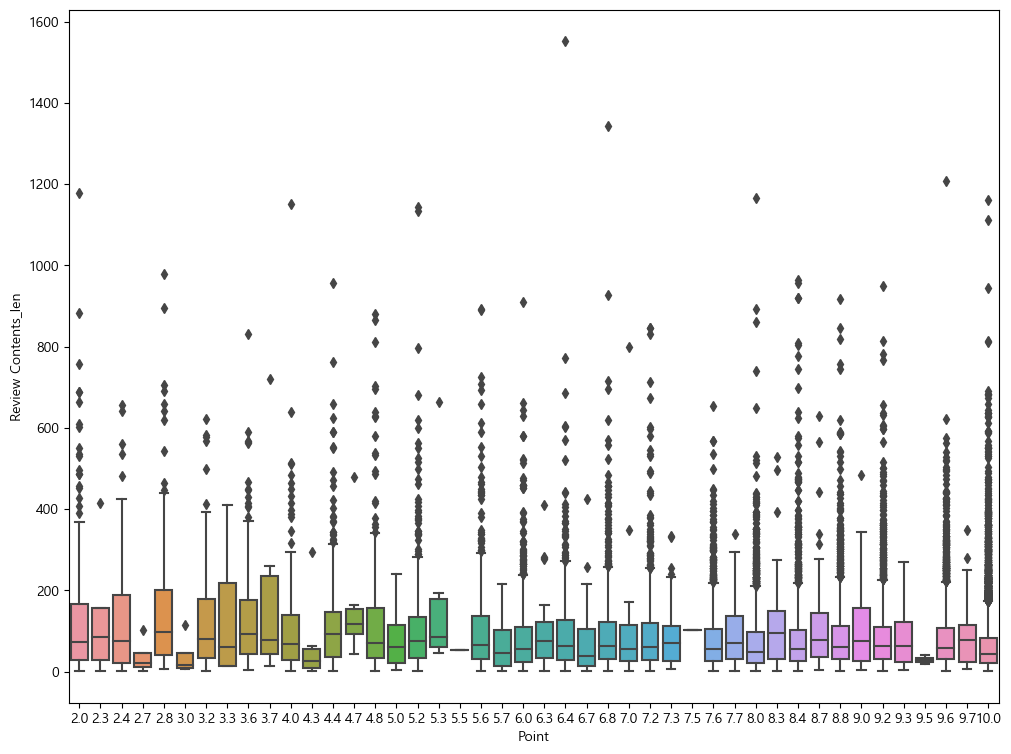

In [13]:
plt.figure(figsize=(12,9))
sns.boxplot(df,x='Point',y='Review Contents_len')

<AxesSubplot: xlabel='Grade', ylabel='Review Contents_len'>

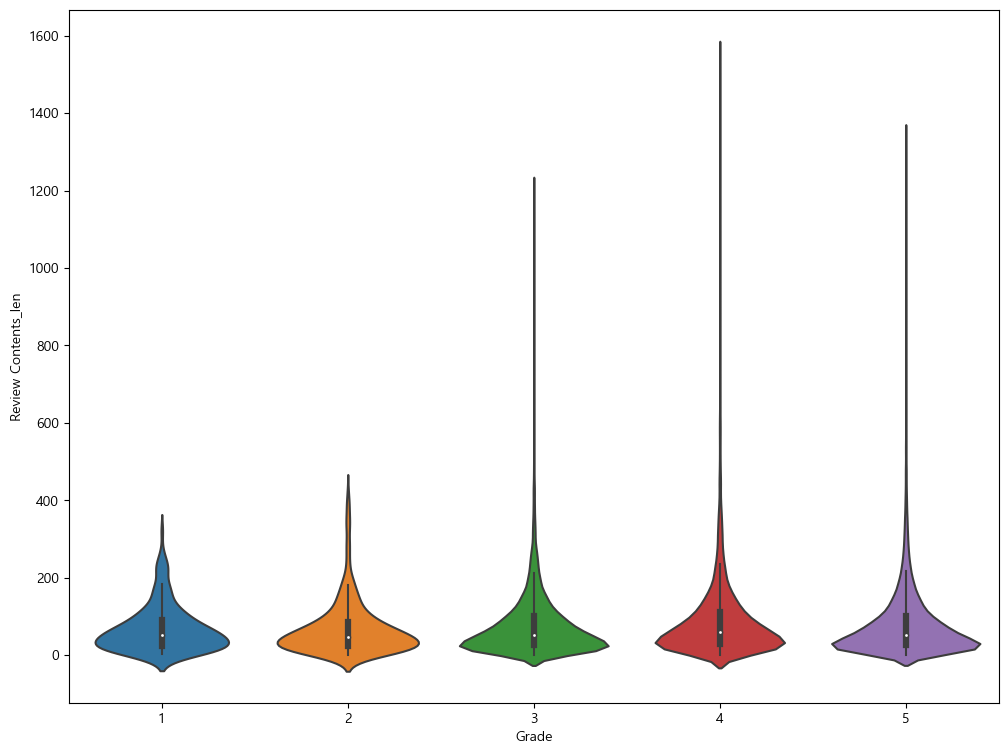

In [14]:
plt.figure(figsize=(12,9))
sns.violinplot(df,x='Grade',y='Review Contents_len')

<AxesSubplot: xlabel='stay_day', ylabel='Review Contents_len'>

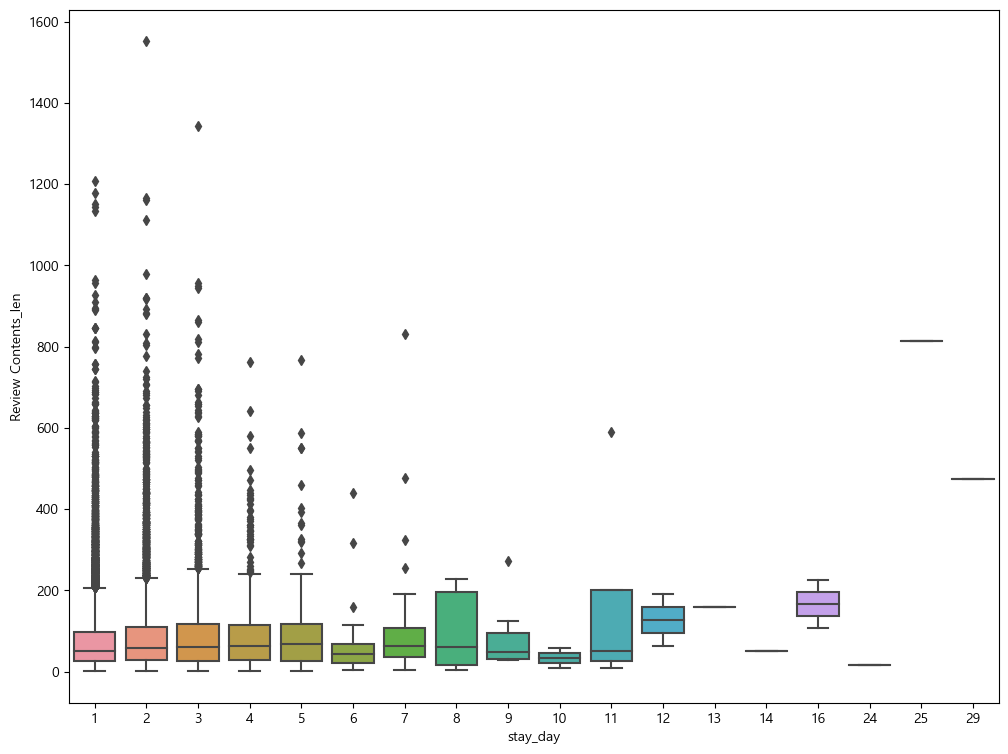

In [15]:
plt.figure(figsize=(12,9))
sns.boxplot(df,x='stay_day',y='Review Contents_len')

In [26]:
#멤버별 평점
df_pivot13 =pd.pivot_table(df, index='member',values='Point', aggfunc=[np.mean,max,min,len])
df_pivot13

mean   max   min    len
                    Point Point Point  Point
member                                      
그룹 여행객           8.660468  10.0   2.0   2221
나홀로 여행객          8.438477  10.0   2.0   7576
유아/아동 동반 가족 여행객  8.562424  10.0   2.0   5248
청소년 동반 가족 여행객    8.474281  10.0   2.0   2469
출장 여행객           8.411191  10.0   2.0   1537
커플/2인 여행객        8.628293  10.0   2.0  11533

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '나홀로 여행객'),
  Text(1, 0, '커플/2인 여행객'),
  Text(2, 0, '유아/아동 동반 가족 여행객'),
  Text(3, 0, '그룹 여행객'),
  Text(4, 0, '출장 여행객'),
  Text(5, 0, '청소년 동반 가족 여행객')])

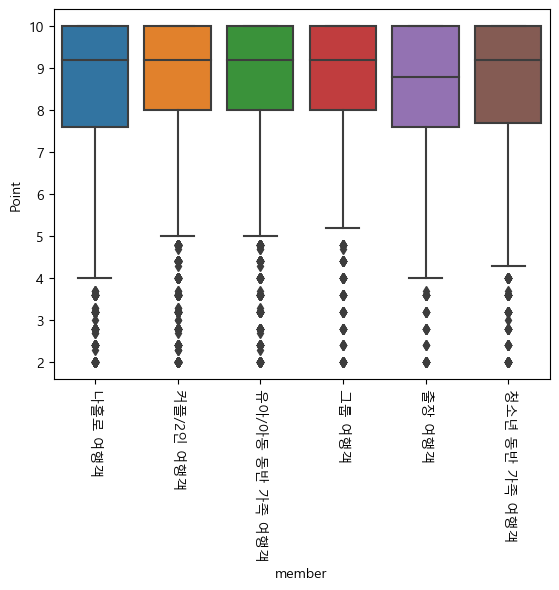

In [28]:
sns.boxplot(df,x='member',y='Point')
plt.xticks(rotation=-90)

<AxesSubplot: xlabel='Month', ylabel='count'>

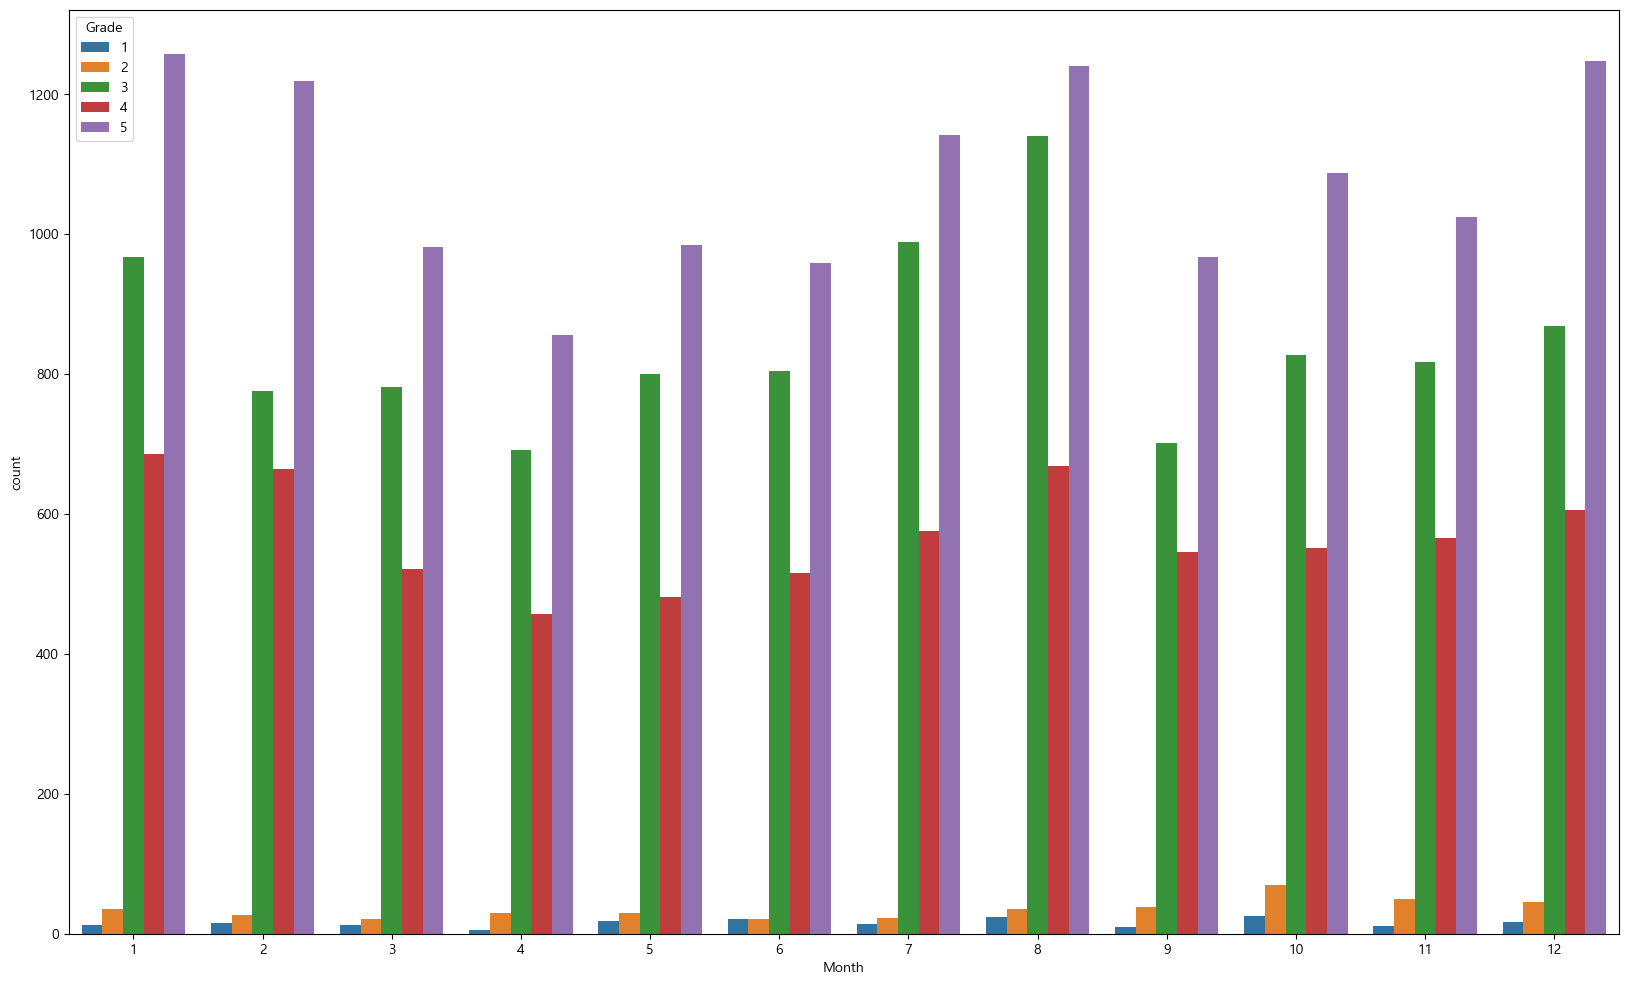

In [25]:
plt.figure(figsize=(20,12))
sns.countplot(df,x='Month',hue='Grade')

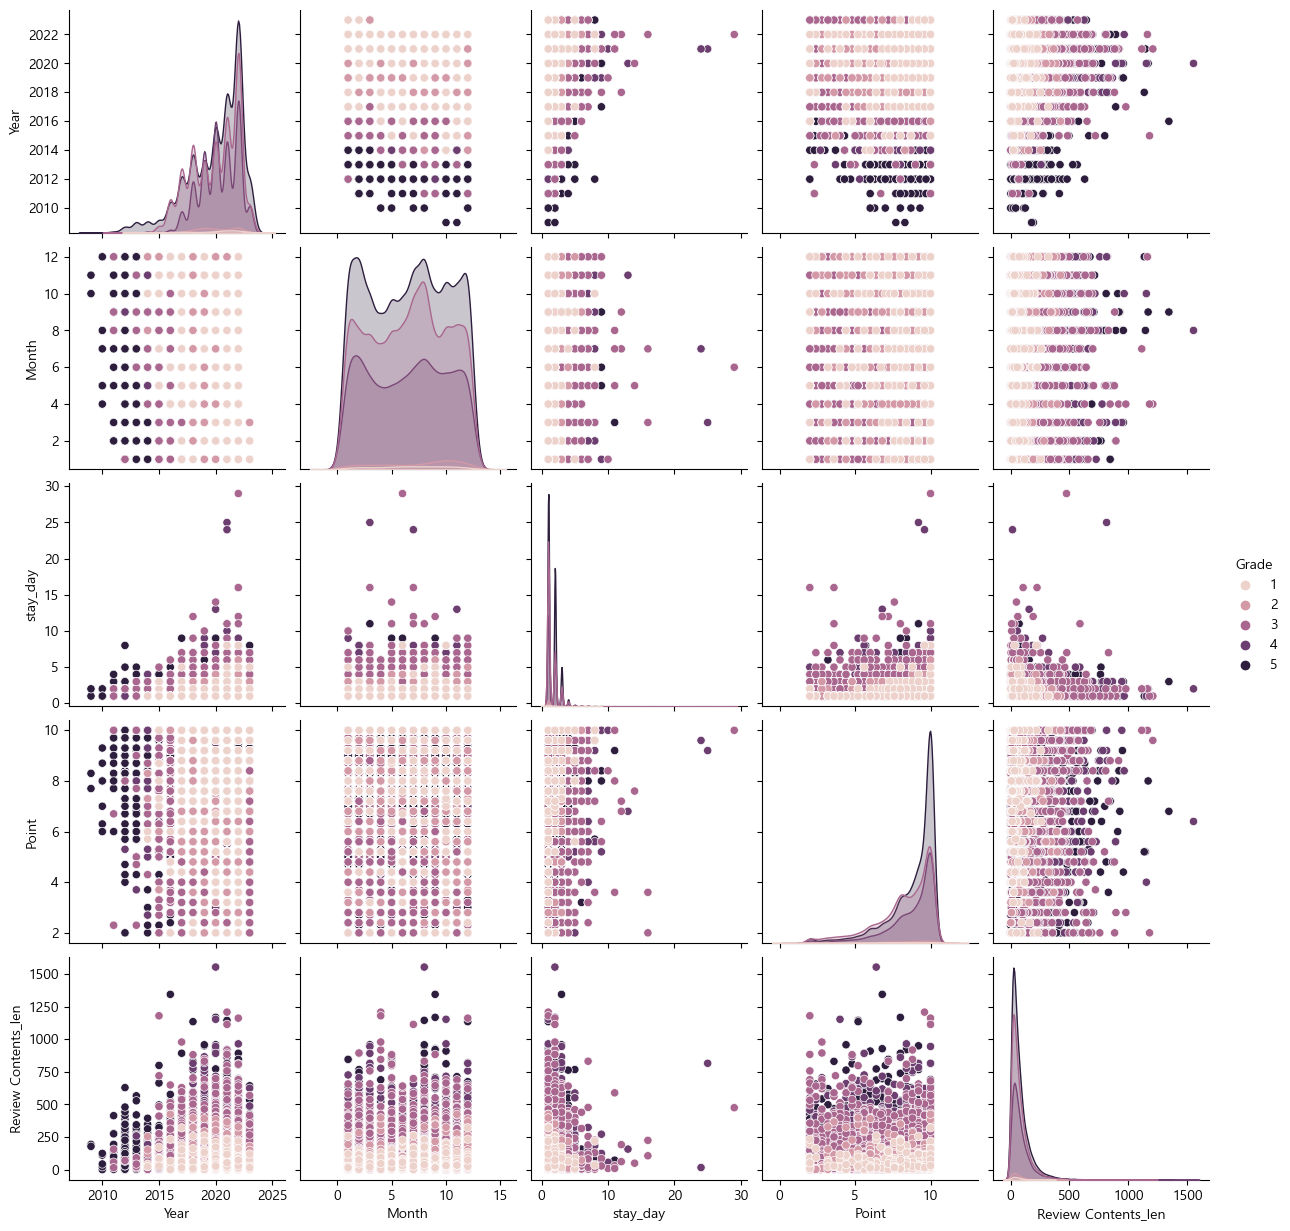

In [100]:
sns.pairplot(df, hue='Grade')

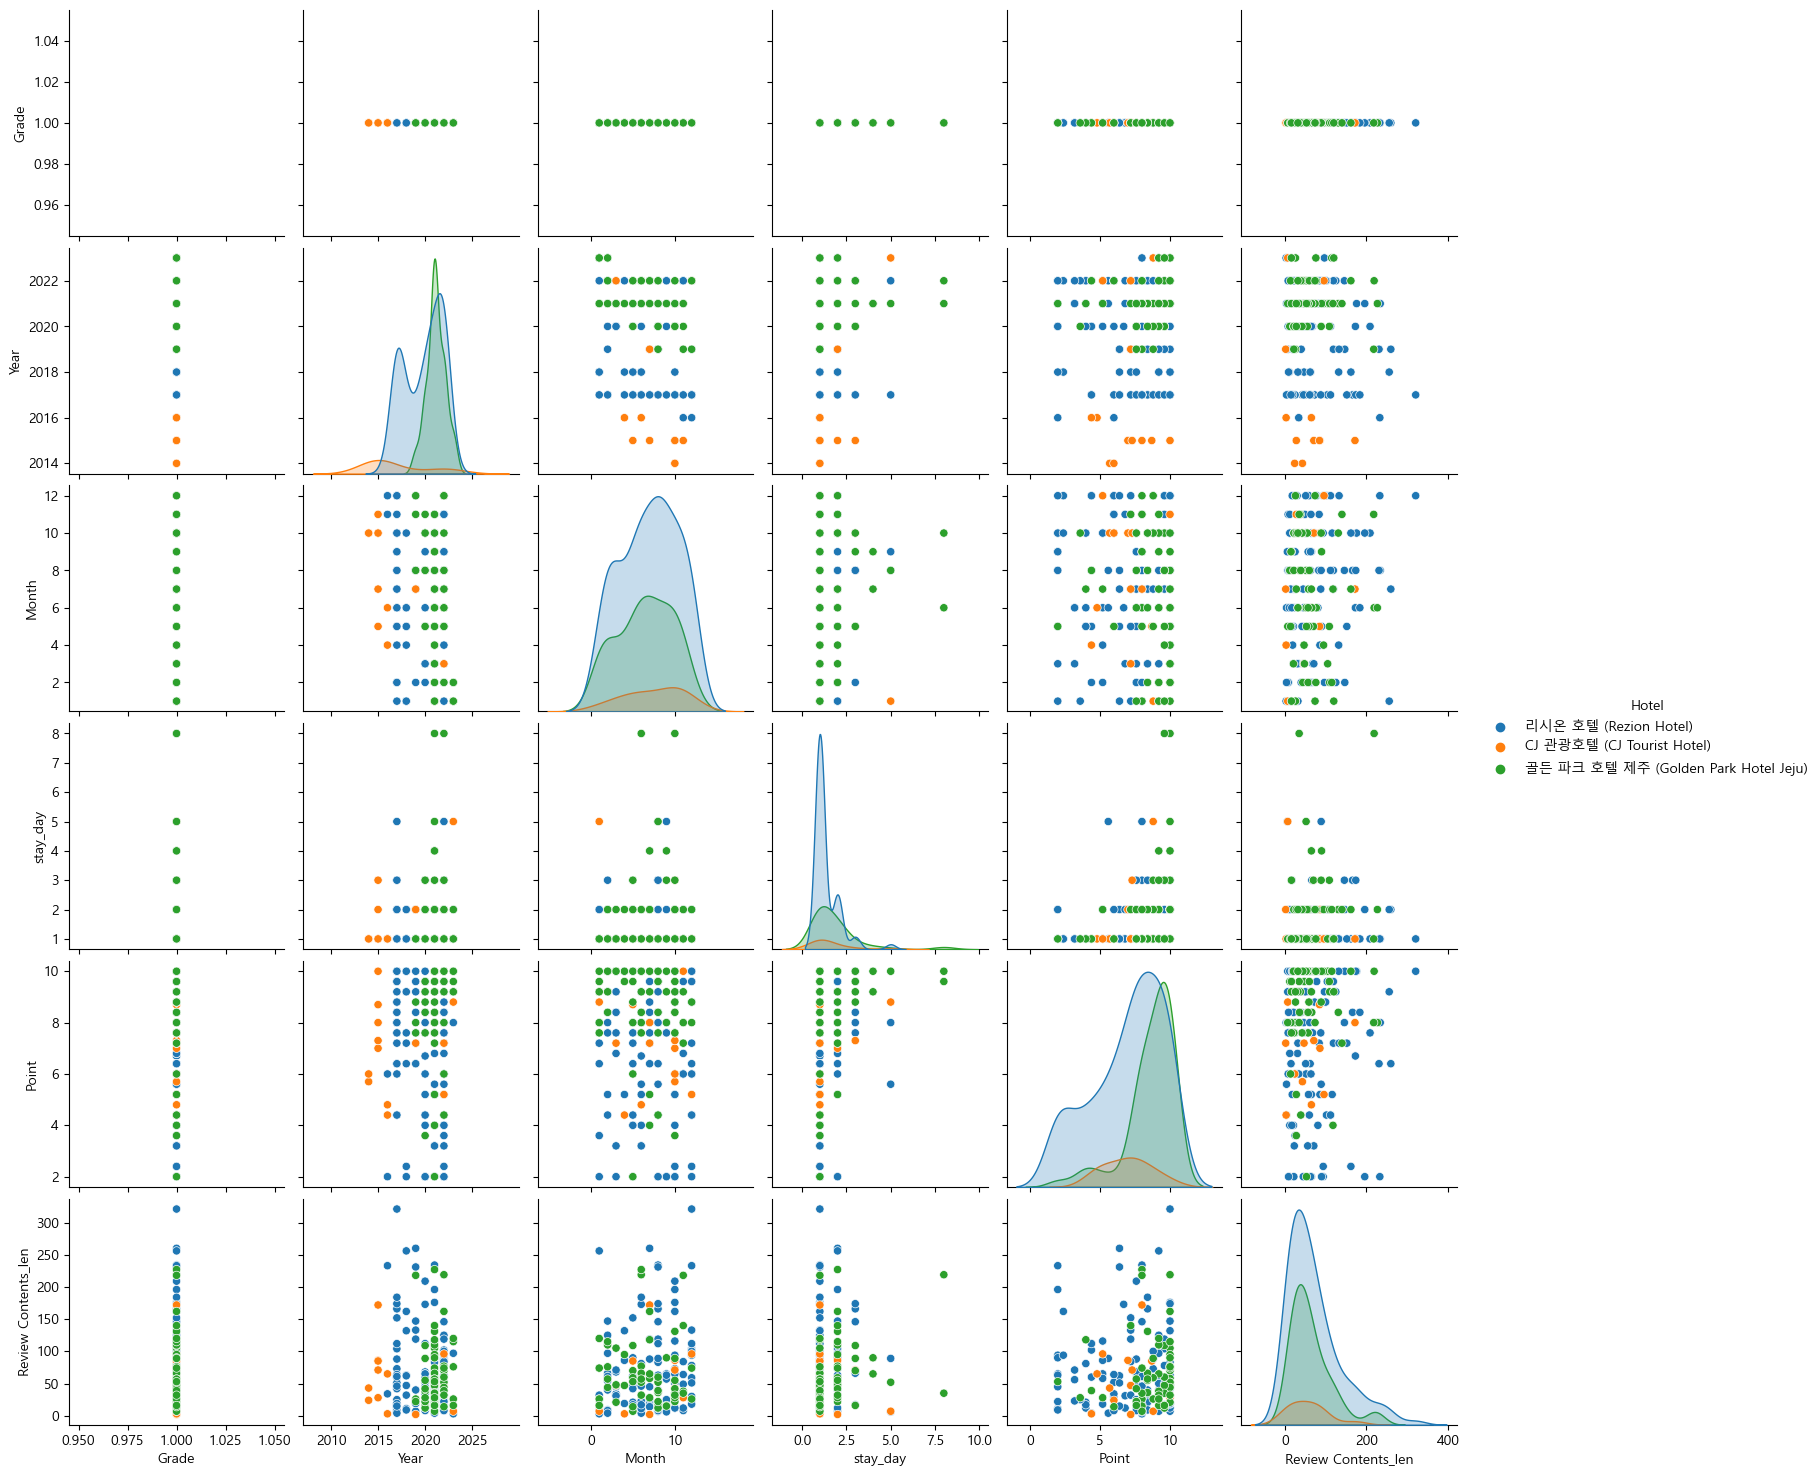

In [112]:
sns.pairplot(df[df['Grade']==1], hue='Hotel')

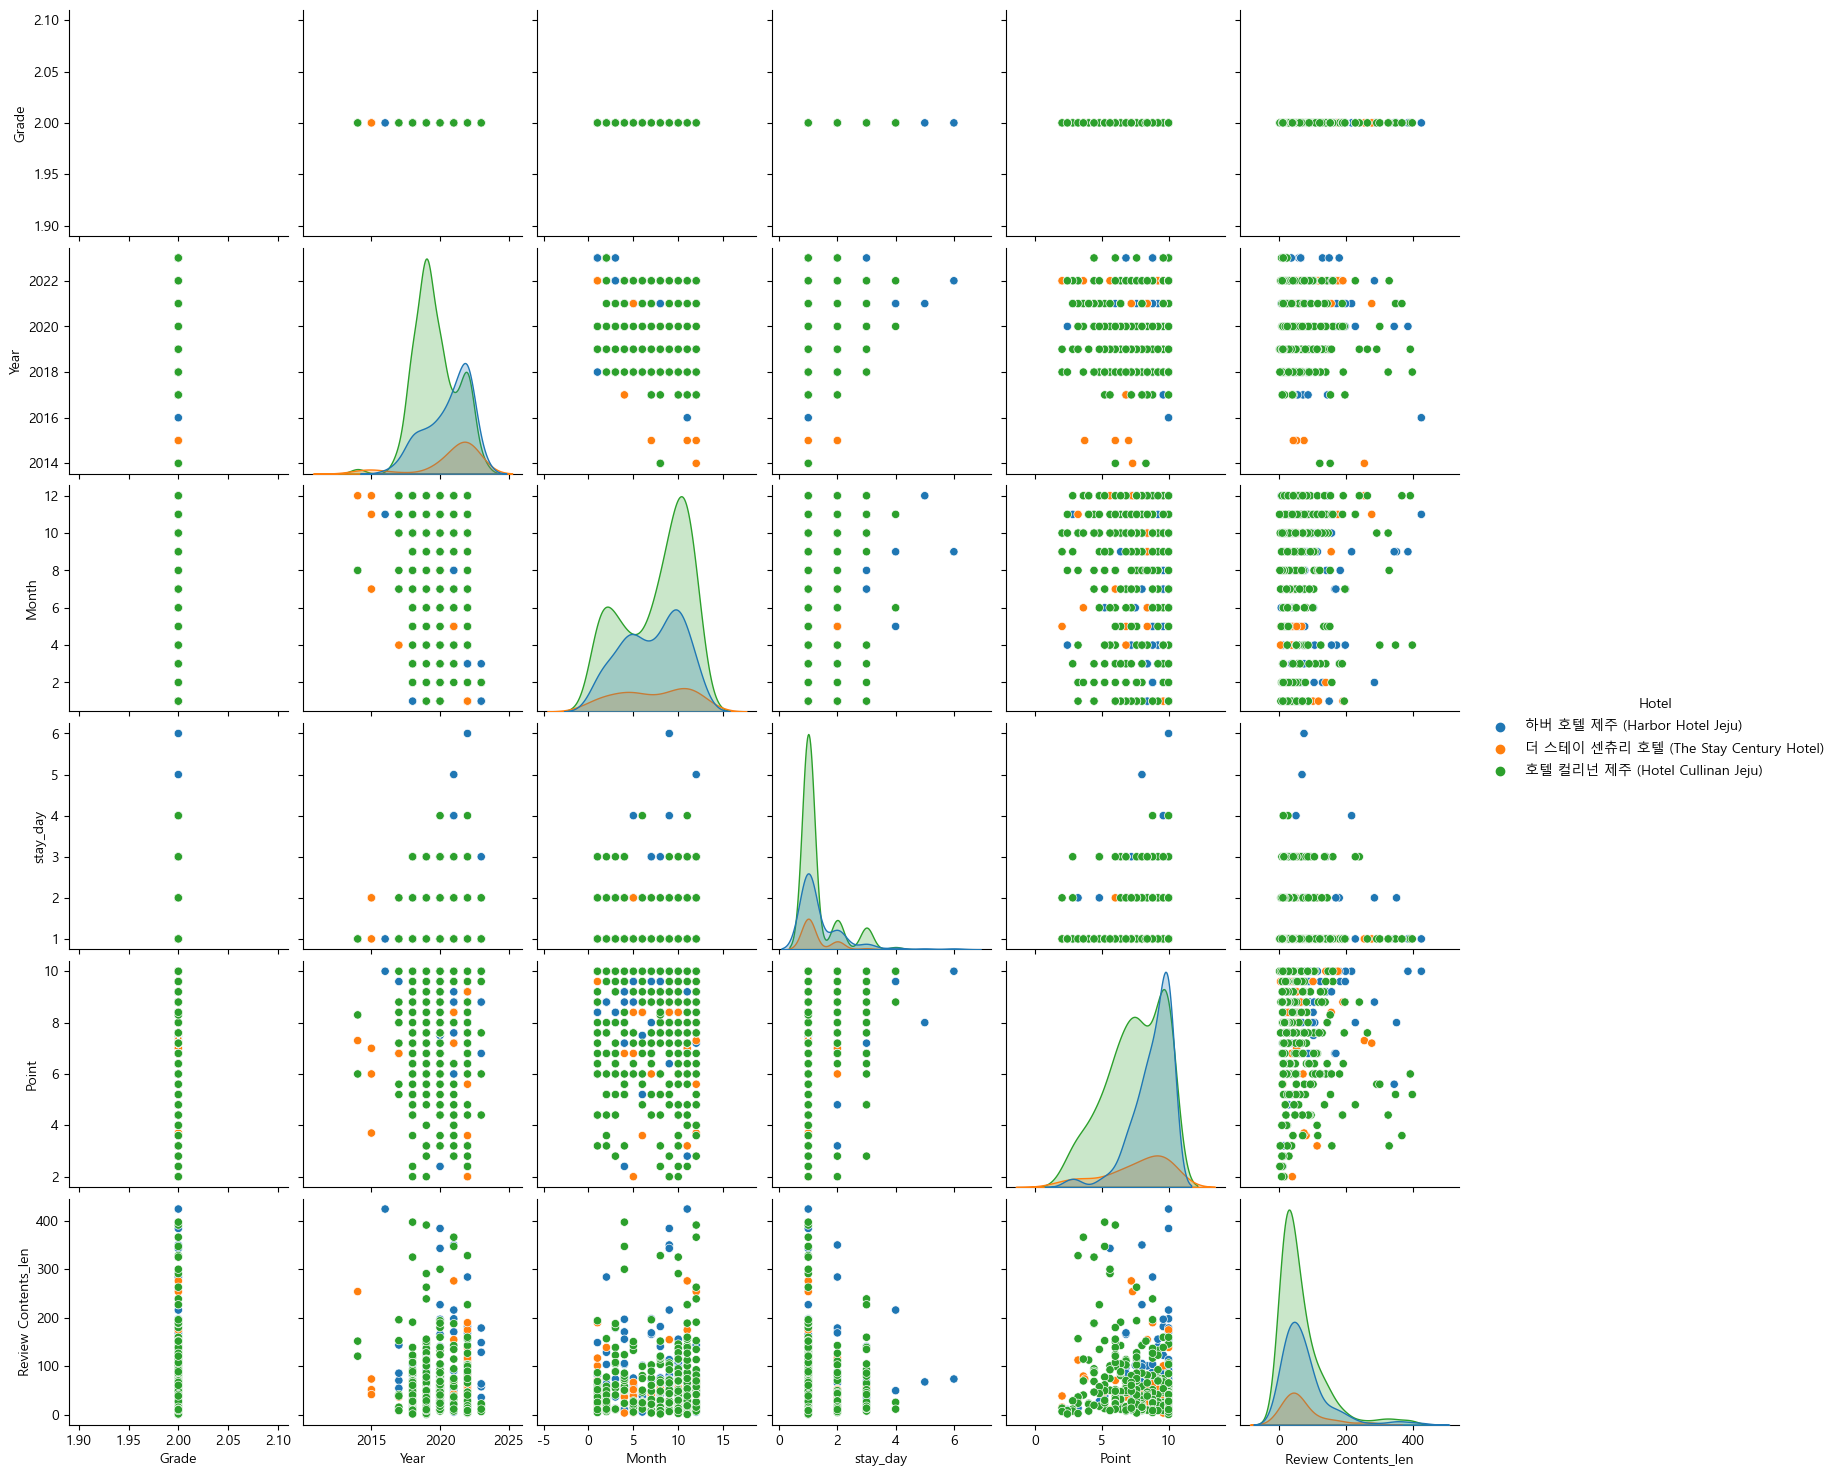

In [113]:
sns.pairplot(df[df['Grade']==2], hue='Hotel')

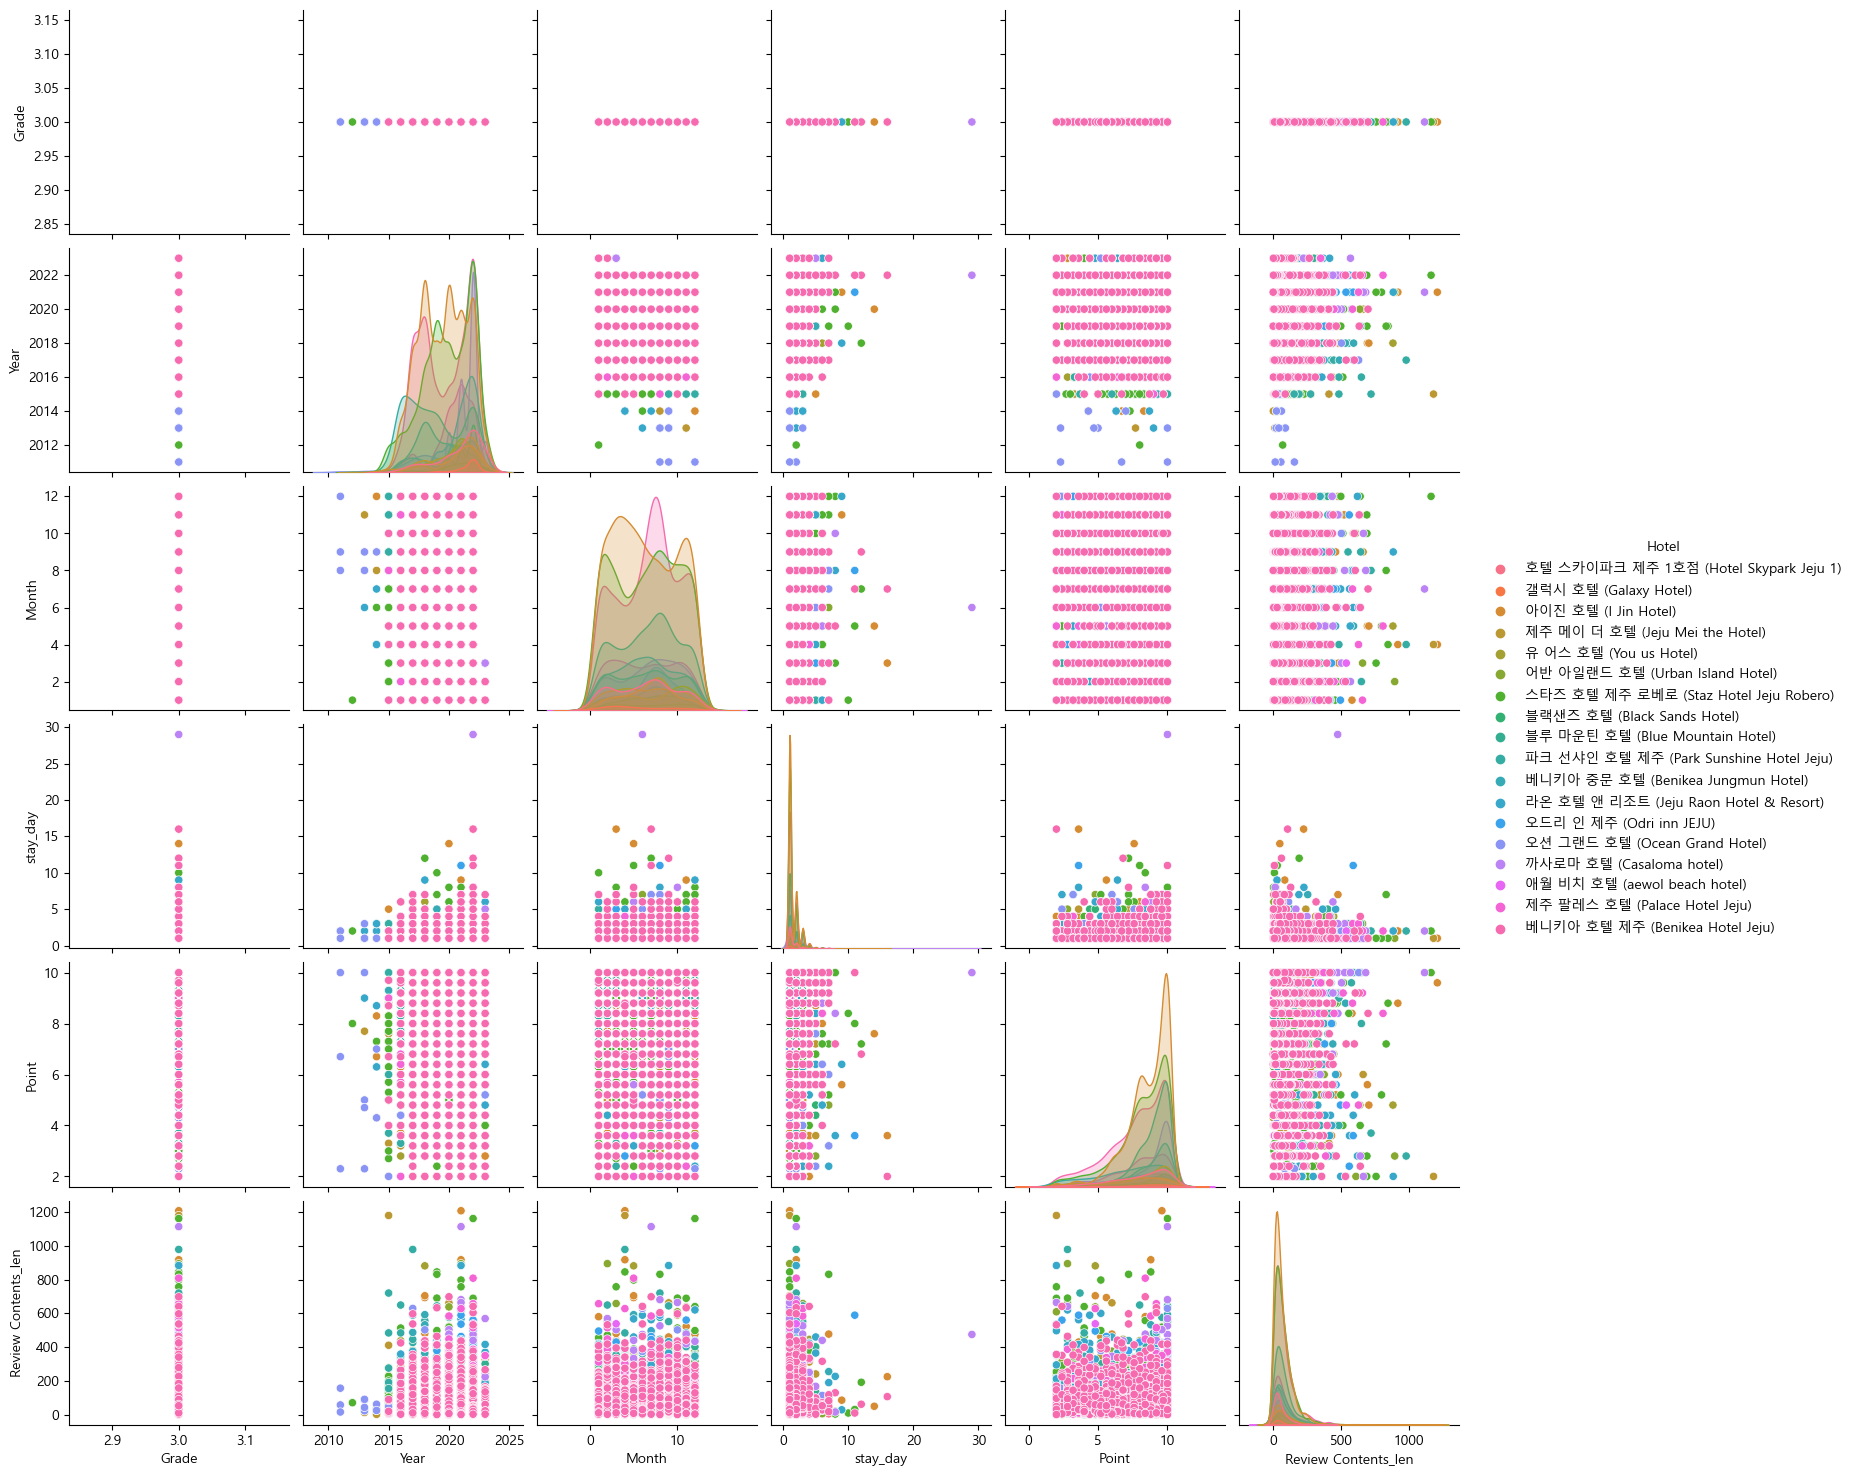

In [114]:
sns.pairplot(df[df['Grade']==3], hue='Hotel')

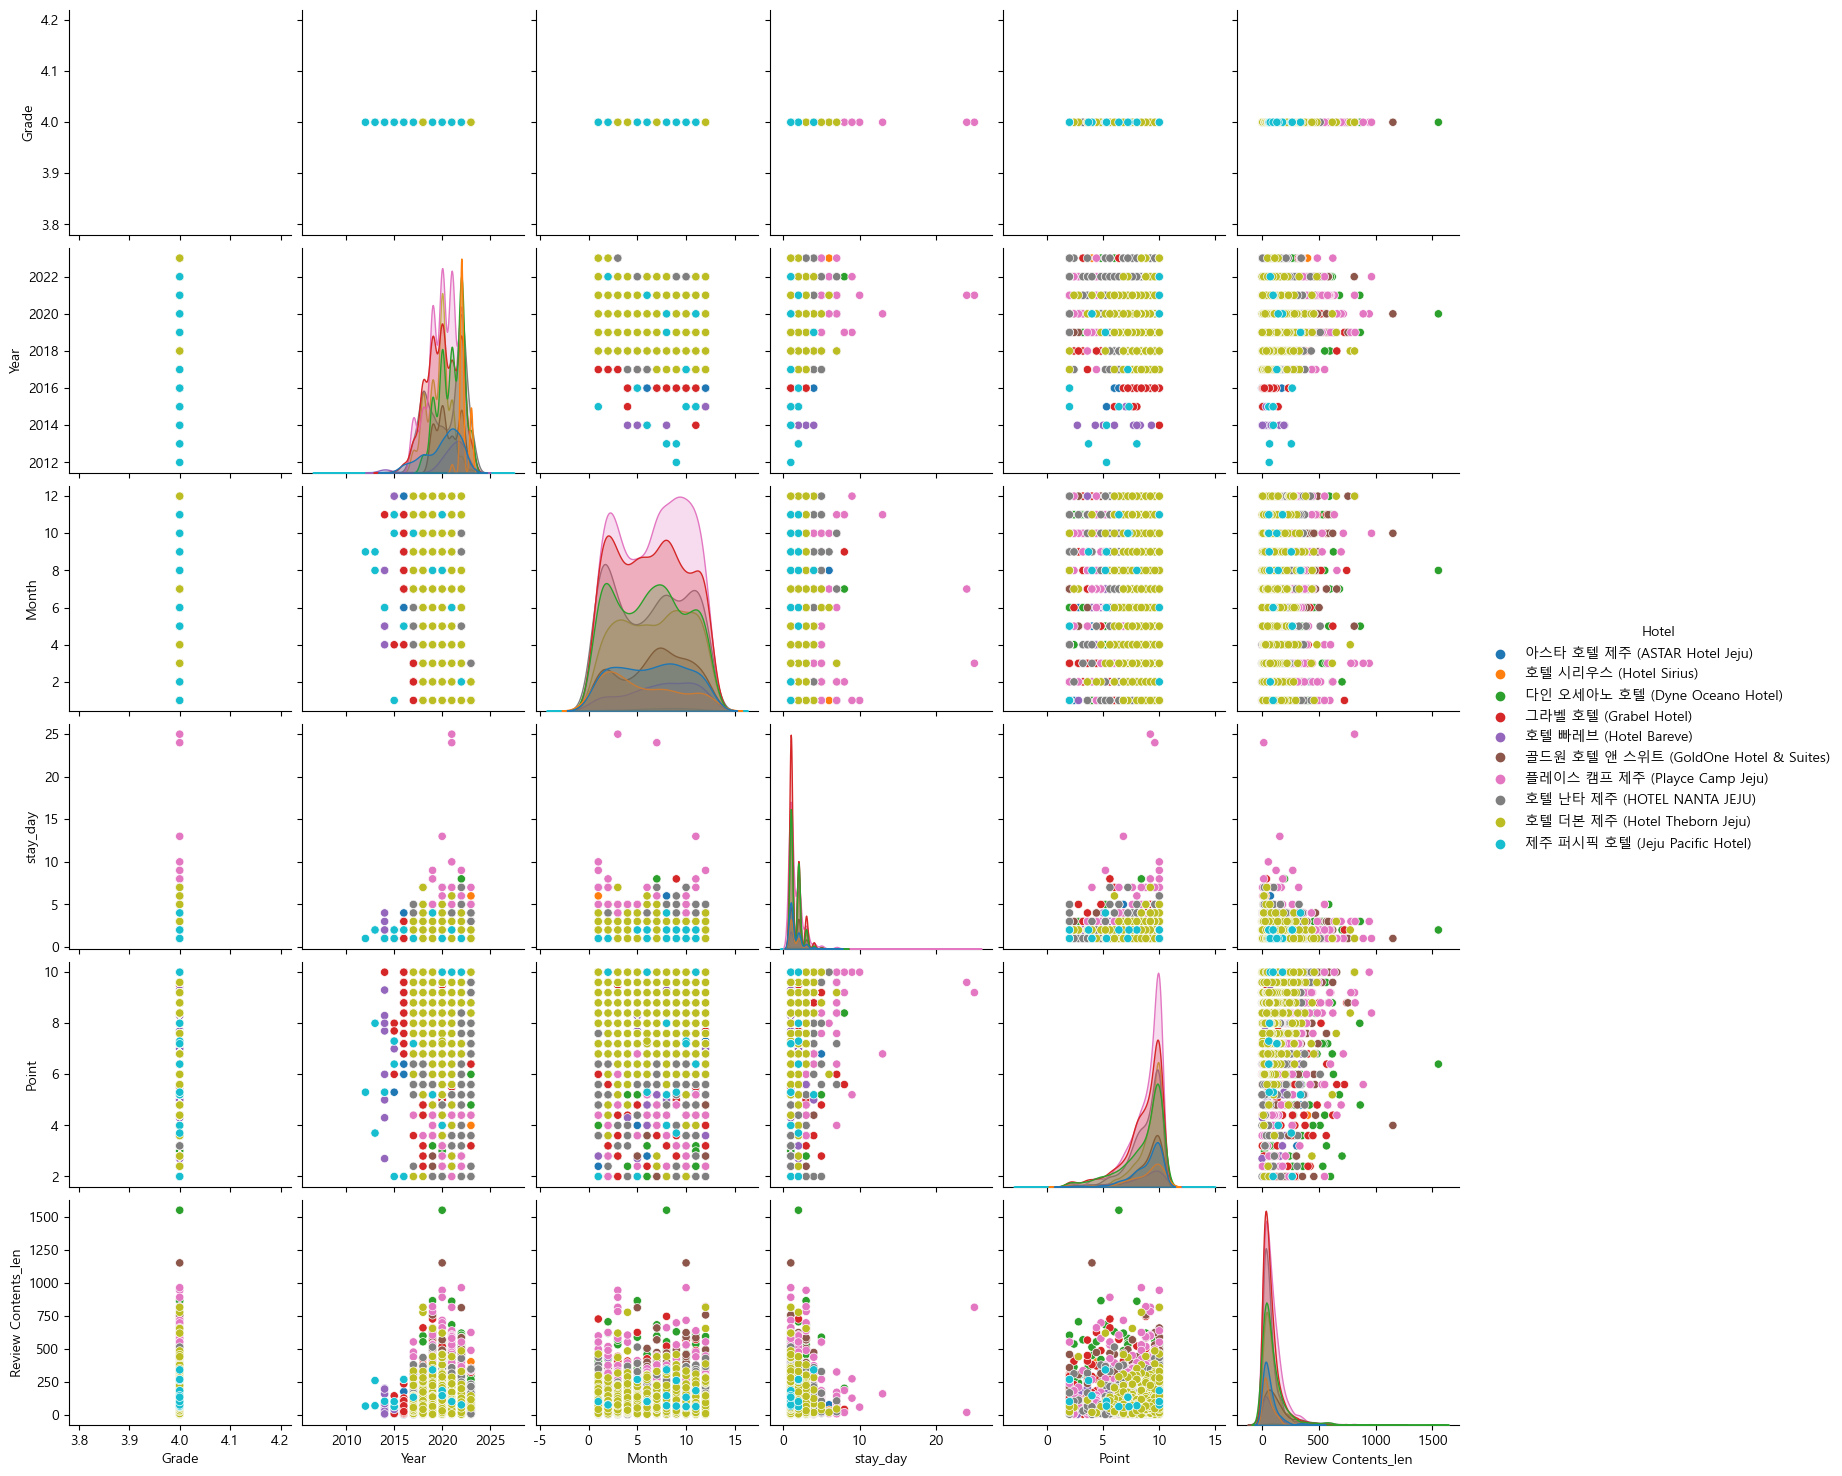

In [115]:
sns.pairplot(df[df['Grade']==4], hue='Hotel')

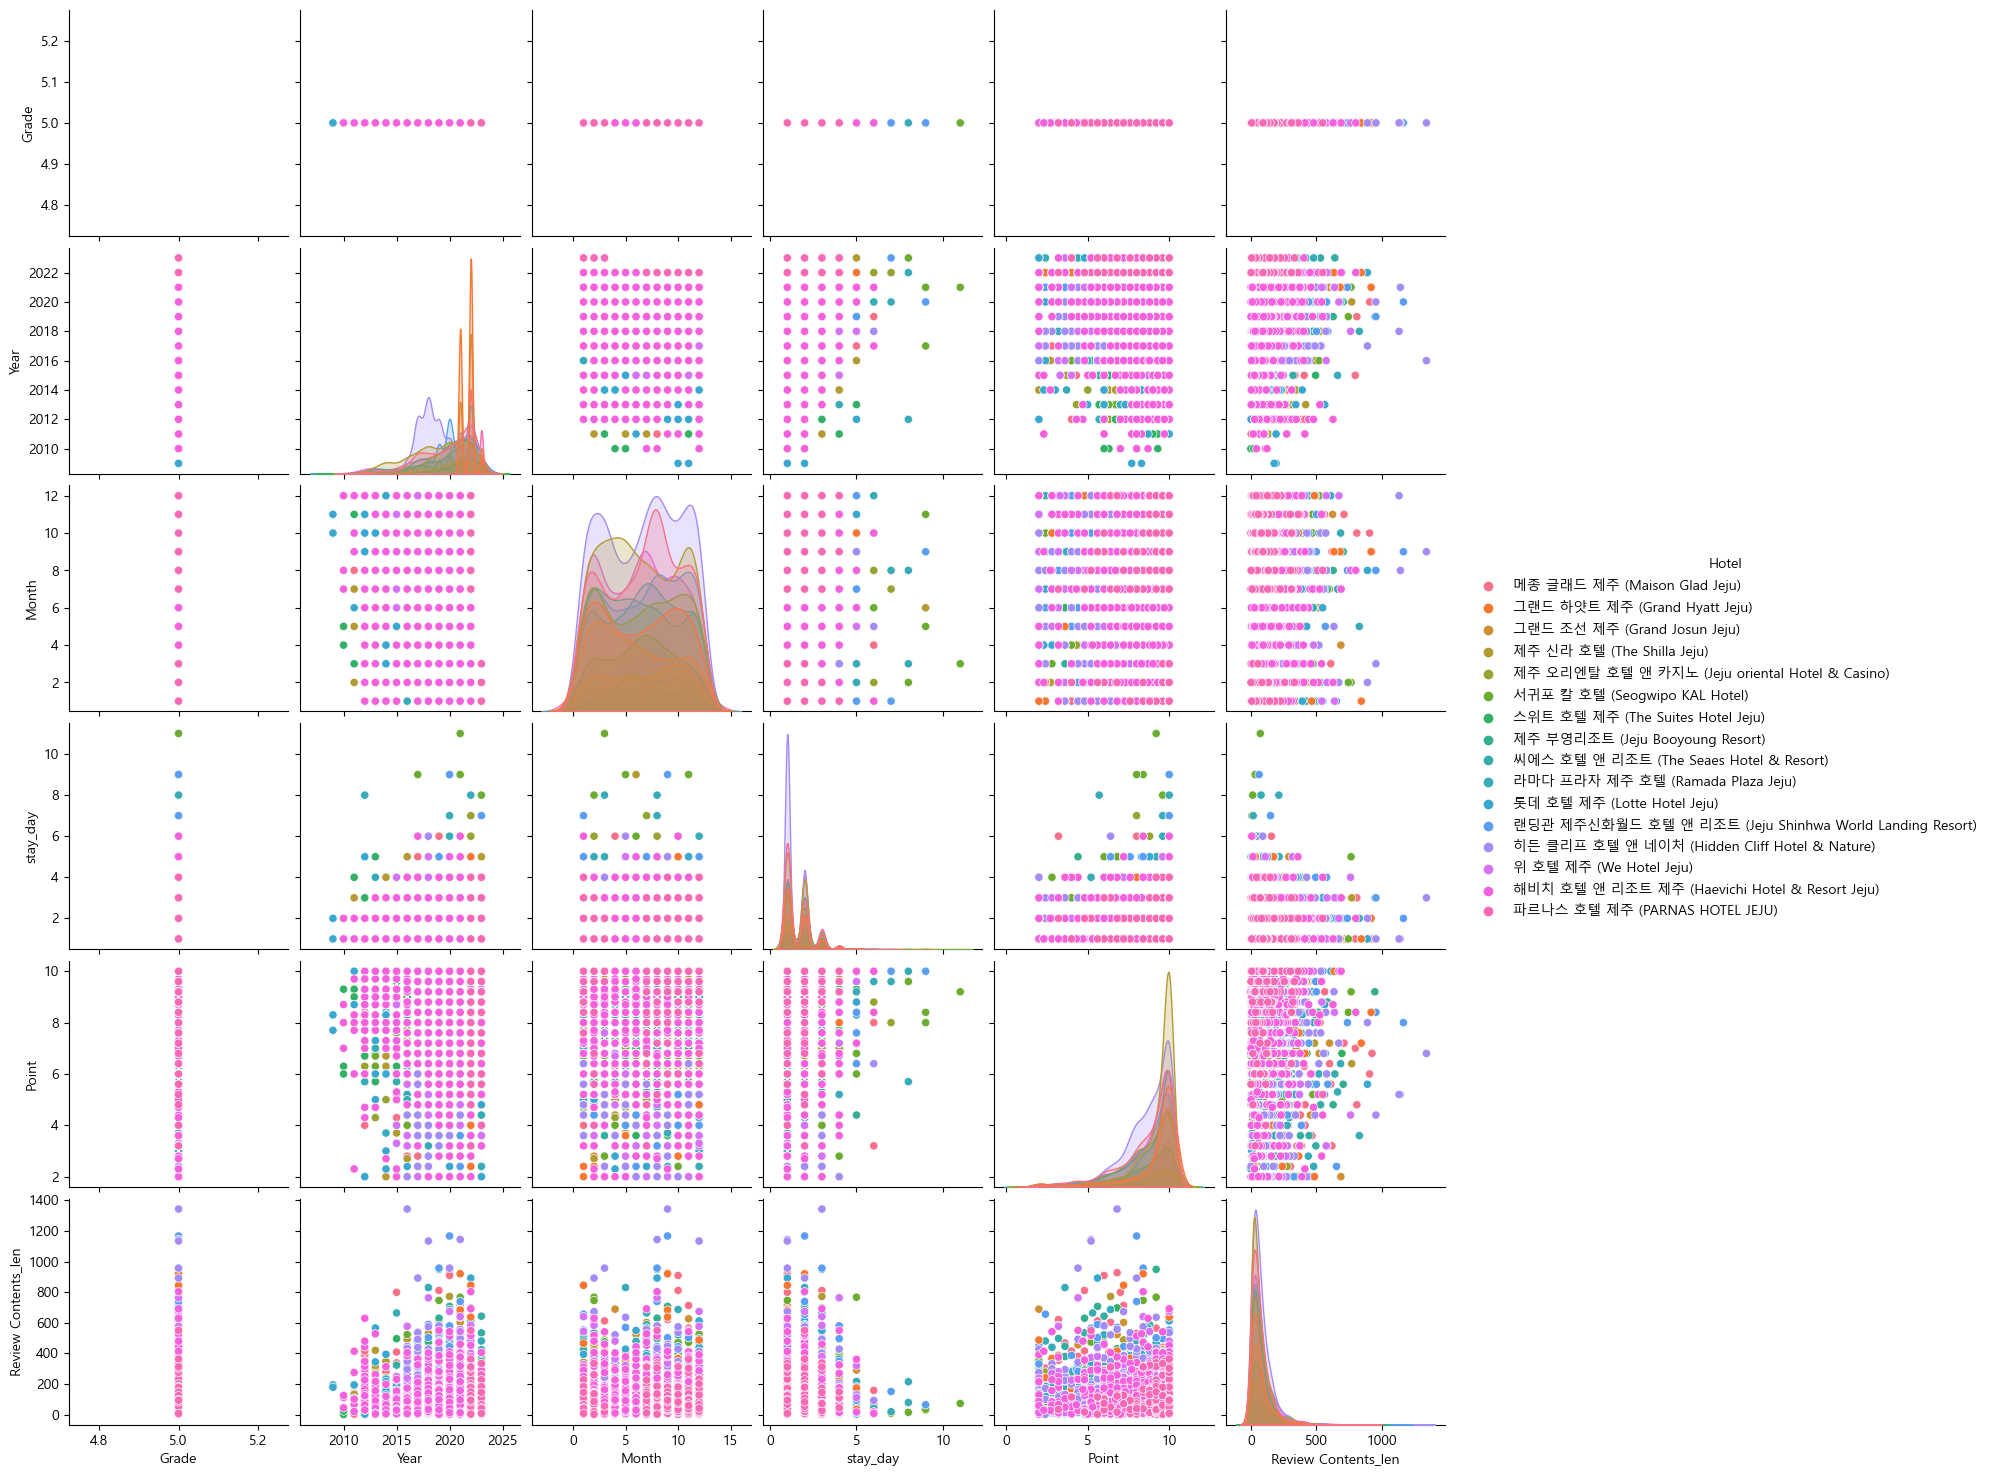

In [116]:
sns.pairplot(df[df['Grade']==5], hue='Hotel')

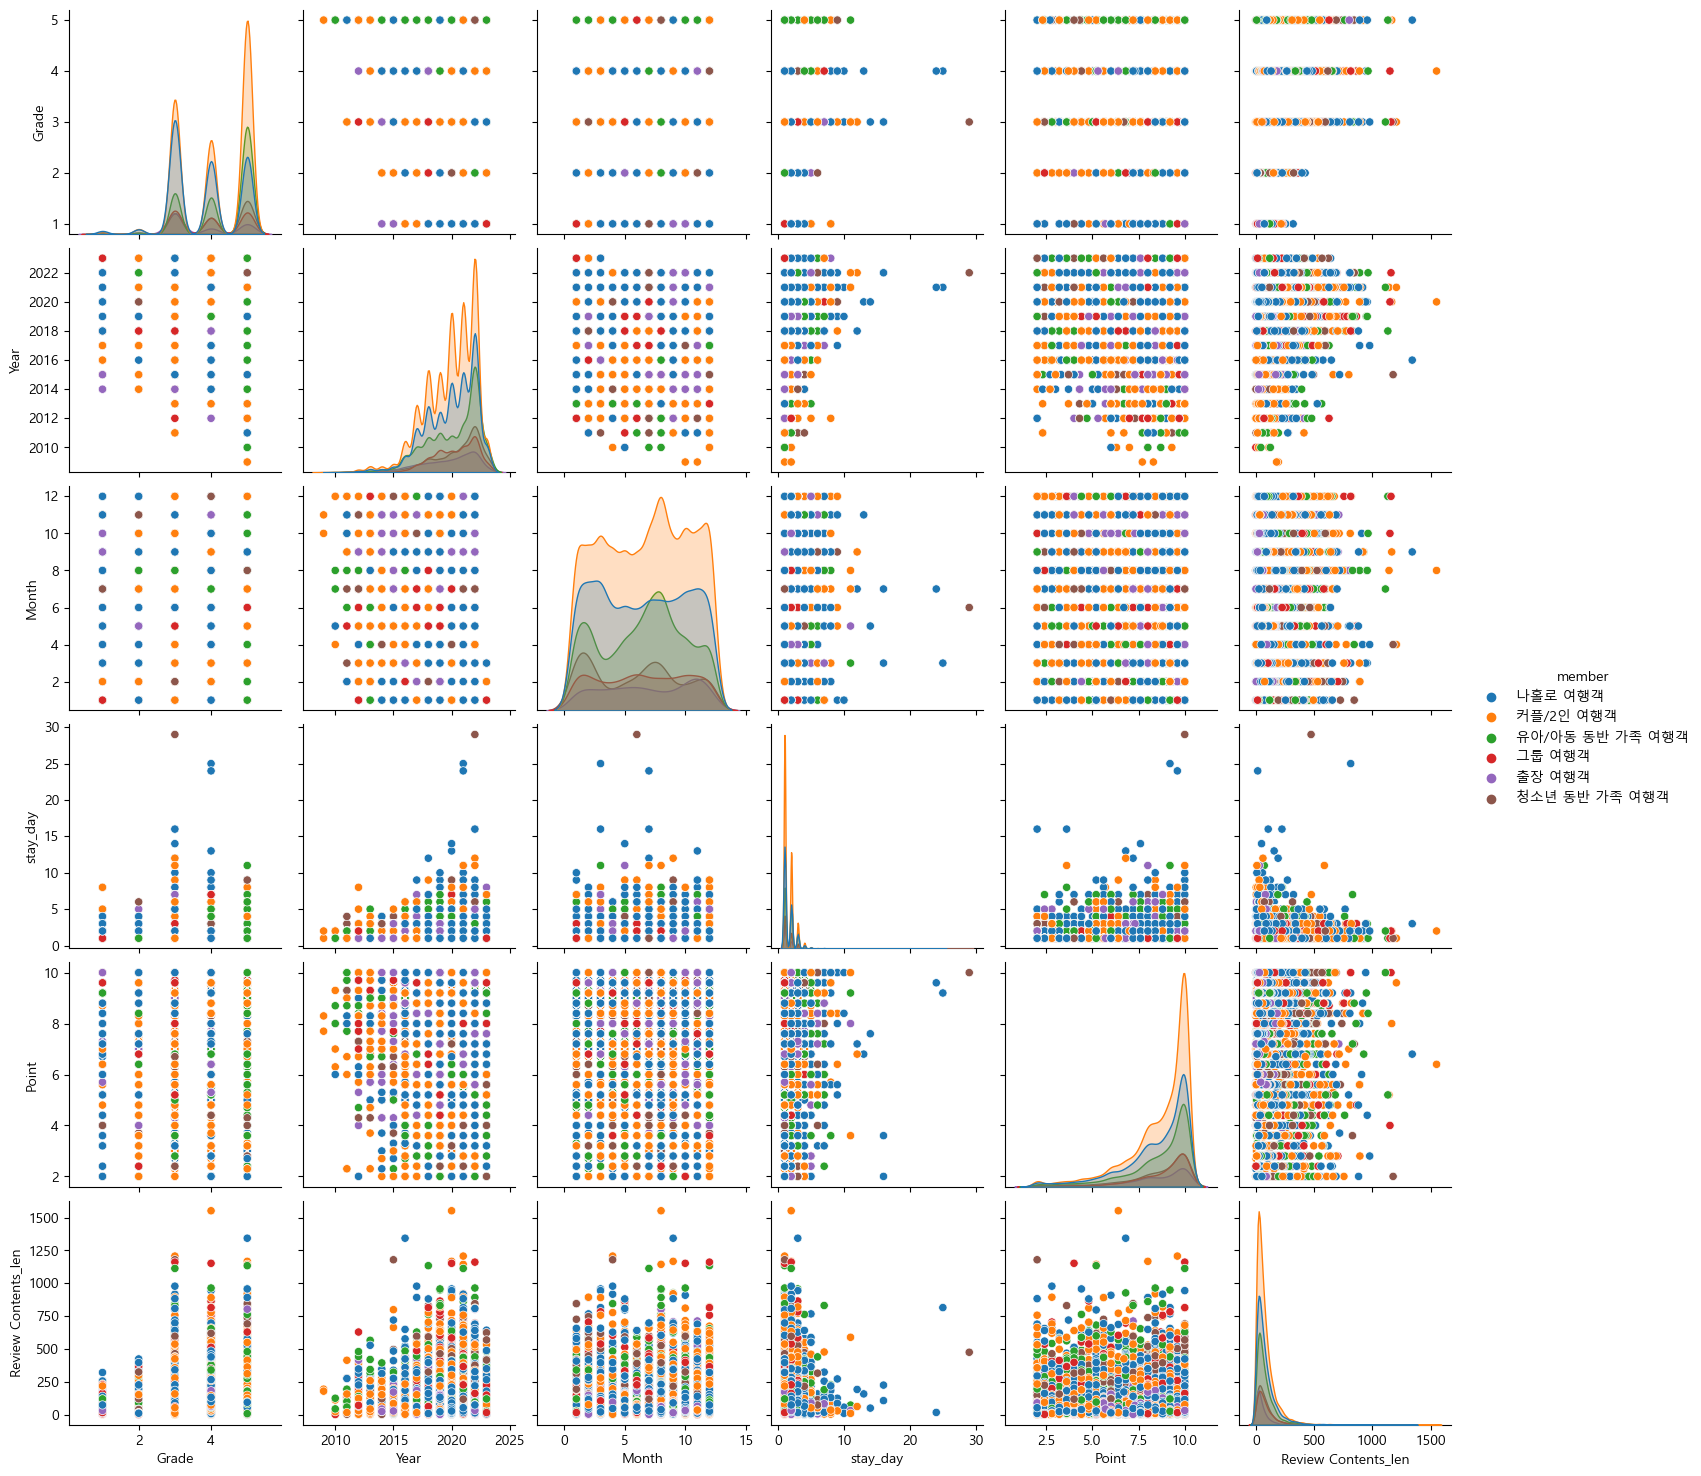

In [32]:
sns.pairplot(df, hue='member')

In [29]:
#멤버별 리뷰글자 수
df_pivot14 =pd.pivot_table(df, index='member',values='Review Contents_len', aggfunc=[np.mean,max,min,len])
df_pivot14

mean                 max                 min  \
                Review Contents_len Review Contents_len Review Contents_len   
member                                                                        
그룹 여행객                    87.627949              1161.0                 1.0   
나홀로 여행객                   84.534228              1343.0                 1.0   
유아/아동 동반 가족 여행객           83.217175              1134.0                 1.0   
청소년 동반 가족 여행객             84.626732              1179.0                 1.0   
출장 여행객                    56.923899               803.0                 1.0   
커플/2인 여행객                 79.973162              1552.0                 1.0   

                                len  
                Review Contents_len  
member                               
그룹 여행객                         2221  
나홀로 여행객                        7576  
유아/아동 동반 가족 여행객                5248  
청소년 동반 가족 여행객                  2469  
출장 여행객                         1537  
커플/2인 여행객                     11533

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '나홀로 여행객'),
  Text(1, 0, '커플/2인 여행객'),
  Text(2, 0, '유아/아동 동반 가족 여행객'),
  Text(3, 0, '그룹 여행객'),
  Text(4, 0, '출장 여행객'),
  Text(5, 0, '청소년 동반 가족 여행객')])

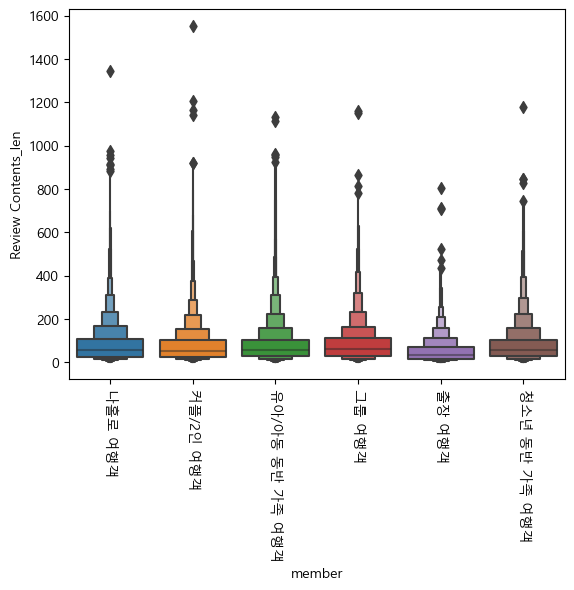

In [31]:
sns.boxenplot(df,x='member',y='Review Contents_len')
plt.xticks(rotation=-90)

In [40]:
#월별 여행멤버
df_pivot15 =pd.pivot_table(df, index='member',values='stay_day',columns='Month', aggfunc=len)
df_pivot15

Month             1    2    3    4    5    6    7     8    9     10   11    12
member                                                                        
그룹 여행객           244  186  149  146  171  221  164   184  163   208  179   206
나홀로 여행객          731  684  736  524  585  530  613   598  587   651  664   673
유아/아동 동반 가족 여행객  507  498  244  295  399  443  604   701  423   406  314   414
청소년 동반 가족 여행객    380  348  110   95  165  158  278   298  112   142  157   226
출장 여행객           128  117  109  118  124  133  116    97   97   146  212   140
커플/2인 여행객        970  869  970  863  868  837  969  1232  880  1009  941  1125

<AxesSubplot: xlabel='Month', ylabel='count'>

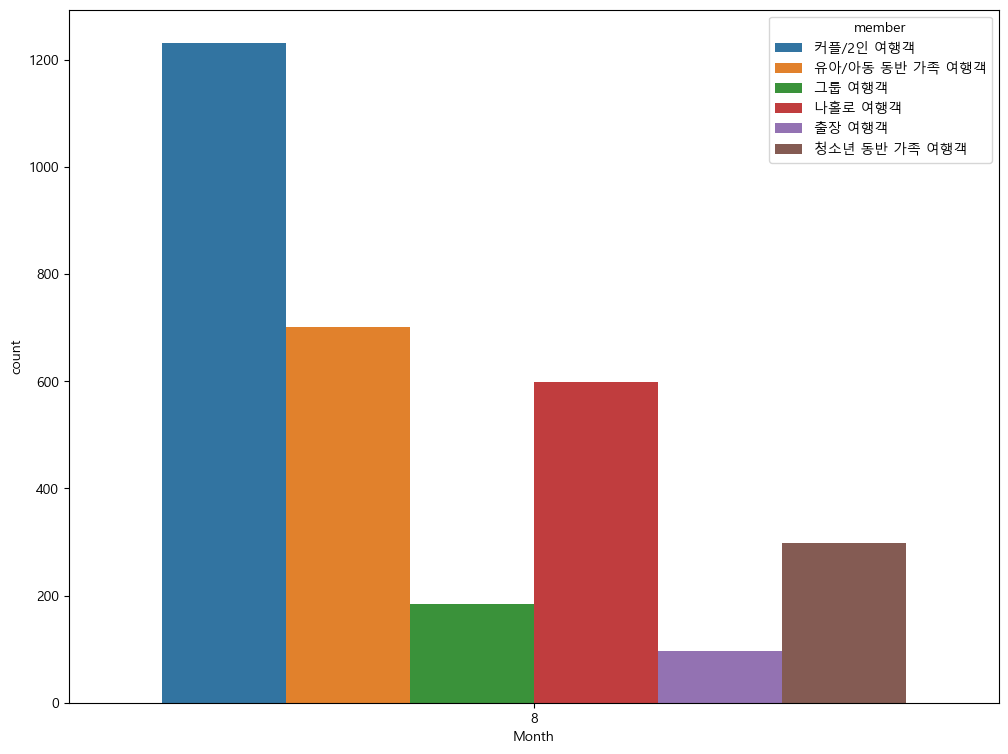

In [27]:
plt.figure(figsize=(12,9))
sns.countplot(df[df['Month']==8],x='Month',hue='member')

In [84]:
#월별 호텔 사용 
df_pivot6 =pd.pivot_table(df, index='Grade',values='Point',columns='Month', aggfunc=np.mean)
df_pivot7 =pd.pivot_table(df, index='Grade',values='Point',columns='Month', aggfunc=len)
df_pivot6

Month        1         2         3         4         5         6         7   \
Grade                                                                         
1      7.600000  8.475000  7.907692  8.200000  7.038889  7.480952  7.828571   
2      8.211111  7.644444  7.561905  7.973333  8.675862  8.090476  8.069565   
3      8.393692  8.319974  8.259923  8.189017  8.169125  8.128696  8.079676   
4      8.843149  8.803012  8.762188  8.759519  8.724116  8.564922  8.582639   
5      8.971145  8.817966  8.864358  8.834930  8.790955  8.798123  8.718651   

Month        8         9         10        11        12  
Grade                                                    
1      7.766667  6.400000  6.892308  7.636364  6.988235  
2      7.908333  7.947368  7.507246  7.595918  7.773333  
3      8.057807  8.256838  8.097101  8.130685  8.336364  
4      8.526607  8.617248  8.617967  8.663009  8.712871  
5      8.647220  8.717994  8.666268  8.849219  8.830393

In [85]:
#월별 호텔등급별 이용률
df_pivot7

Month    1     2    3    4    5    6     7     8    9     10    11    12
Grade                                                                   
1        13    16   13    6   18   21    14    24   10    26    11    17
2        36    27   21   30   29   21    23    36   38    69    49    45
3       967   776  781  692  800  805   989  1140  702   828   818   869
4       686   664  521  457  481  516   576   669  545   551   565   606
5      1258  1219  982  856  984  959  1142  1241  967  1088  1024  1247

<AxesSubplot: xlabel='Month', ylabel='count'>

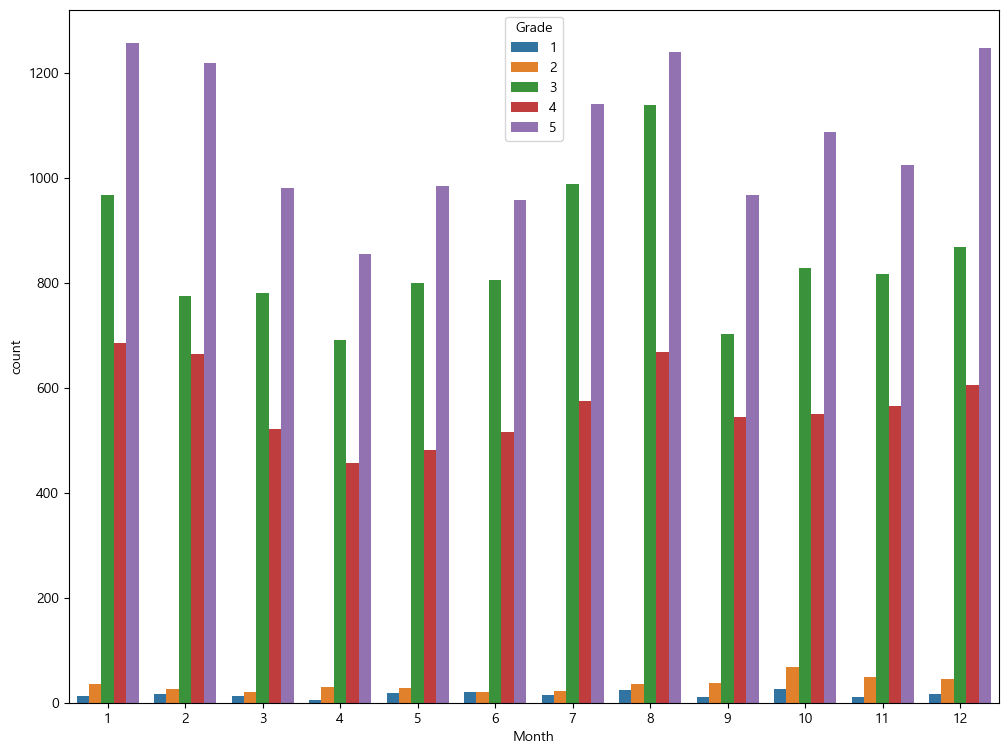

In [58]:
plt.figure(figsize=(12,9))
sns.countplot(df,x='Month',hue='Grade')

<AxesSubplot: xlabel='Month', ylabel='Point'>

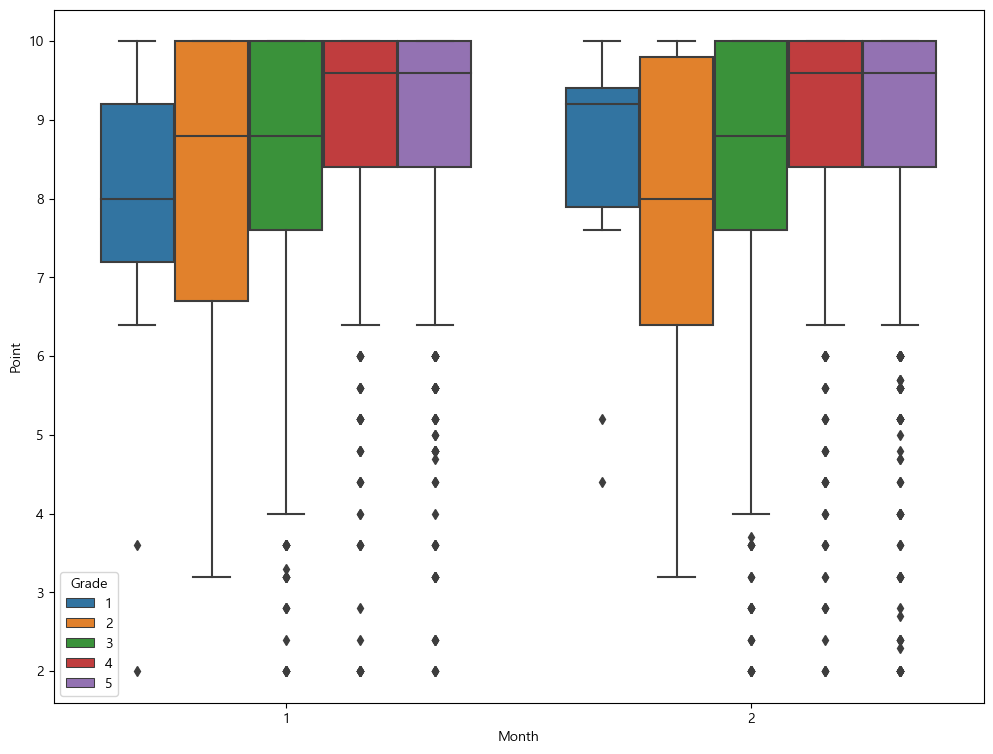

In [74]:
plt.figure(figsize=(12,9))
sns.boxplot(df[(df['Month']==1)|(df['Month']==2)],x='Month',y='Point',hue='Grade')

<AxesSubplot: xlabel='member', ylabel='count'>

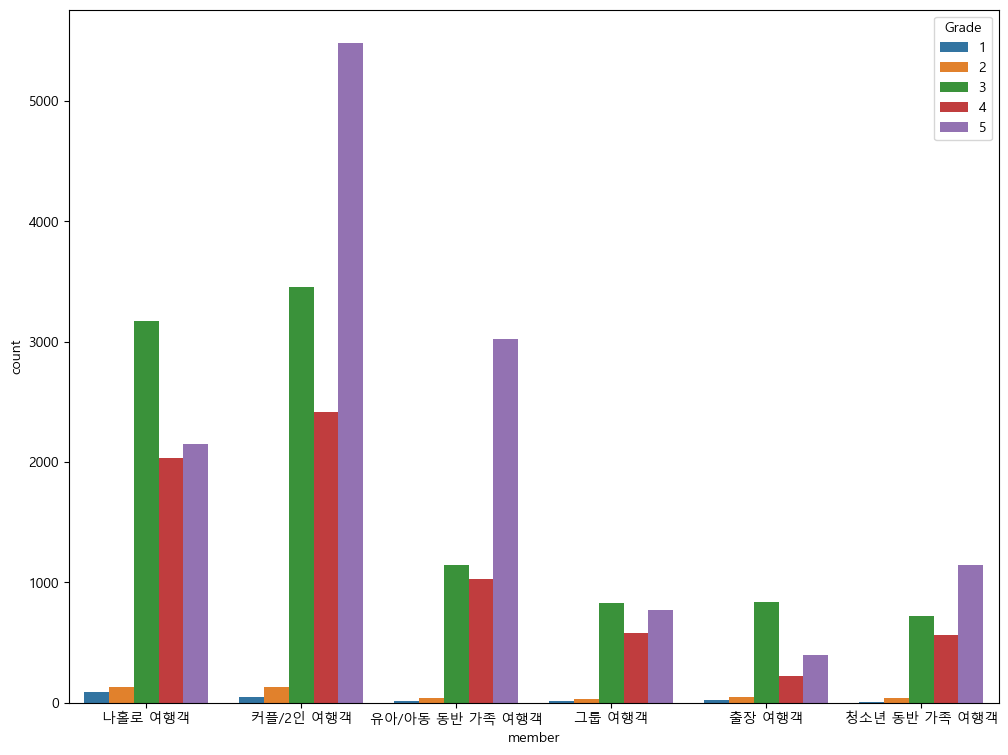

In [146]:
plt.figure(figsize=(12,9))
sns.countplot(df,x='member',hue='Grade')

In [86]:
#숙박일수 피벗테이블
# df_pivot15 =pd.pivot_table(df, index='member',values='stay_day',columns='Month', aggfunc=len)
df_pivot8=pd.pivot_table(df, index=["member"], columns=["Grade"], values=["stay_day"], aggfunc=["mean"])
df_pivot8

mean                                        
                 stay_day                                        
Grade                   1         2         3         4         5
member                                                           
그룹 여행객           1.285714  1.281250  1.490975  1.555556  1.462240
나홀로 여행객          1.627907  1.348485  1.537323  1.702117  1.518587
유아/아동 동반 가족 여행객  1.333333  1.125000  1.613240  1.613217  1.804571
청소년 동반 가족 여행객    1.250000  1.350000  1.486787  1.626998  1.713036
출장 여행객           1.560000  1.549020  1.540024  1.477679  1.507500
커플/2인 여행객        1.437500  1.271318  1.445473  1.495443  1.571376

In [93]:
df_pivot9 =pd.pivot_table(df, index='Grade',values='Point',columns='stay_day')
df_pivot9

stay_day        1         2         3         4         5          6   \
Grade                                                                   
1         7.050388  8.166667  8.850000  9.600000  8.100000        NaN   
2         7.816970  8.083333  7.600000  9.600000  8.000000  10.000000   
3         8.137657  8.331004  8.405658  8.146341  8.201887   7.509677   
4         8.700672  8.646997  8.689034  8.777099  8.472727   9.000000   
5         8.775163  8.818514  8.788268  8.786222  8.971429   8.433333   

stay_day        7         8    9     10   11   12   13   14   16   24   25  \
Grade                                                                        
1              NaN  9.800000  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2              NaN       NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3         7.355556  7.840000  6.0   8.4  7.2  7.0  NaN  7.6  2.8  NaN  NaN   
4         8.235294  8.300000  7.6  10.0  NaN  NaN  6.8  NaN  NaN  9.6  9.2   
5         9.400000  8.433333  9.1   NaN  9.2  NaN  NaN  NaN  NaN  NaN  NaN   

stay_day    29  
Grade           
1          NaN  
2          NaN  
3         10.0  
4          NaN  
5          NaN

In [97]:
df_pivot10 =pd.crosstab(df['Grade'],df['stay_day'],margins=True)
df_pivot10

stay_day      1     2     3    4    5   6   7   8  9  10  11  12  13  14  16  \
Grade                                                                          
1           129    42    10    2    4   0   0   2  0   0   0   0   0   0   0   
2           330    60    28    4    1   1   0   0  0   0   0   0   0   0   0   
3          6769  2261   813  205   53  31  18   5  2   1   3   2   0   1   2   
4          4020  1998   611  131   44   6  17   4  2   1   0   0   1   0   0   
5          6905  4494  1270  225   49  12   4   3  4   0   1   0   0   0   0   
All       18153  8855  2732  567  151  50  39  14  8   2   4   2   1   1   2   

stay_day  24  25  29    All  
Grade                        
1          0   0   0    189  
2          0   0   0    424  
3          0   0   1  10167  
4          1   1   0   6837  
5          0   0   0  12967  
All        1   1   1  30584

In [99]:
pd.crosstab(df["Grade"], df["member"],margins=True)

member  그룹 여행객  나홀로 여행객  유아/아동 동반 가족 여행객  청소년 동반 가족 여행객  출장 여행객  커플/2인 여행객  \
Grade                                                                        
1           14       86               12              4      25         48   
2           32      132               40             40      51        129   
3          831     3175             1148            719     837       3457   
4          576     2031             1029            563     224       2414   
5          768     2152             3019           1143     400       5485   
All       2221     7576             5248           2469    1537      11533   

member    All  
Grade          
1         189  
2         424  
3       10167  
4        6837  
5       12967  
All     30584

In [158]:
round(pd.crosstab(df["Grade"], df["member"],margins=True,normalize='columns')*100,2)

member  그룹 여행객  나홀로 여행객  유아/아동 동반 가족 여행객  청소년 동반 가족 여행객  출장 여행객  커플/2인 여행객  \
Grade                                                                        
1         0.63     1.14             0.23           0.16    1.63       0.42   
2         1.44     1.74             0.76           1.62    3.32       1.12   
3        37.42    41.91            21.88          29.12   54.46      29.97   
4        25.93    26.81            19.61          22.80   14.57      20.93   
5        34.58    28.41            57.53          46.29   26.02      47.56   

member    All  
Grade          
1        0.62  
2        1.39  
3       33.24  
4       22.35  
5       42.40

In [28]:
# 불용어 (https://www.ranks.nl/stopwords/korean) 불용어 리셋시 사용

korean_stopword='./stopwords.txt'

with open(korean_stopword, encoding='utf-8') as f:
    stopwords=f.readlines()

stoplist=[x.strip() for x in stopwords]

# df['morphs3'] = df['morphs'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
# df['morphs3'] = df['morphs3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

In [29]:
# 불용어 추가시 코드 실행
add_list=['제주도','호텔','숙소','가성','성비','대비','이용','제주','역시','생각','상태','다만','바로','느낌','신라','직원','가격','위치','시설','조식','객실','그냥','너무','수영장','입니다']

for word in add_list:
    stoplist.append(word)

morphs_final = Counter({x : remove_morphs_counter[x]for x in remove_morphs_counter if x not in stoplist})

df['morphs3'] = df['morphs'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
df['morphs3'] = df['morphs3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

NameError: name 'Counter' is not defined

In [ ]:
import string
string.punctuation

#형태소
df['morphs3'] = df['morphs'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
df['morphs3'] = df['morphs3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

#명사
# df['nouns3'] = df['nouns'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
# df['nouns3'] = df['nouns3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

#9점이상 6점미만 데이터만 분류(학습용)
df2=copy.deepcopy(df)
df2=df2[(df2['Point']>=9)|(df2['Point']<6)] #해당 구간 변경하기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X3 = df2['morphs3']
# X4 = df2['nouns3']
y2 = df2['Point_index']
X1 = df['morphs3']
y = df['Point_index']


# Train data와 test data로 나누기

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y2, test_size = 0.2, random_state=13)
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y2, test_size = 0.2, random_state=13)

vectorizer2 = CountVectorizer(min_df=5,lowercase=False)  #min_df 이하 갯수인거 무시(변경 가능)
vectorizer2.fit(X3_train)  #X3 전체사용하려면 X3로 변경(기본 X3_train)
X3_train = vectorizer2.transform(X3_train)
X3_test = vectorizer2.transform(X3_test)
# X4_train = vectorizer2.transform(X4_train)
# X4_test = vectorizer2.transform(X4_test)
X1 = vectorizer2.transform(X1)  #전체 데이터


model3 = MultinomialNB()
#형태소 기준
model3.fit(X3_train, y3_train)
pred3 = model3.predict(X3_test)


print("테스트 결과")
print_clf_eval(y3_test, pred3)

print("\n","============="*20)
# #형태소 기준
pred_all = model3.predict(X1)

print("전체 리뷰 평가")
print_clf_eval(y, pred_all)